In [ ]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

In [1]:
# The starter code is short and simple, take a look!
from starter import *

import random

# Phase 1 - Create Inputs

In [2]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

In [3]:
# G = nx.empty_graph(N_SMALL)
# small(G)
# visualize(G)
# write_input(G, 'inputs/small.in')

# G = nx.empty_graph(N_MEDIUM)
# medium(G)
# visualize(G)
# write_input(G, 'inputs/medium.in')

# G = nx.empty_graph(N_LARGE)
# large(G)
# visualize(G)
# write_input(G, 'inputs/large.in')

# Phase 2 - Implement your Solver

In [4]:
from greedy_algorithm import *

In [5]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(5, 10)
    max_per_team = len(G.nodes) / k
    teams = [0 for _ in range(k)]
    for v in G.nodes:
        look_for_team = True
        while look_for_team:
            this_team = random.randint(1, k)
            if teams[this_team - 1] < max_per_team:
                G.nodes[v]['team'] = this_team
                teams[this_team - 1] += 1
                look_for_team = False

In [6]:
def current_solve(in_file):
    def current_solve_helper(G: nx.Graph):
        file_name = in_file[in_file.index("/") + 1:]
        file_name = file_name[:file_name.index("in")]
        instance = read_input(in_file)
        current_solution = read_output(instance, "outputs" + "/" + file_name + "out")
        for v in G.nodes:
            G.nodes[v]['team'] = current_solution.nodes[v]['team']
    return current_solve_helper

In [24]:
# Assign a team to v with G.nodes[v]['team'] = team_id
# Access the team of v with team_id = G.nodes[v]['team']

def solve(G: nx.Graph):
    
    # TODO: Try updating specific nodes, and seeing which changes to make based on homework 11 algorithm
    # TODO: Decrease the amount of nodes updated as time goes on
    # TODO: Do these steps for k-1, k, and k+1, pick the best

    if len(G.nodes) > 350:
        random_solve(G)
    else:
        k = optimize_k(G)
        G = max_k_cut_solve(k)(G)

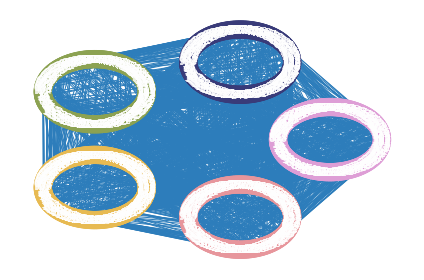

solve 396219.2493960704


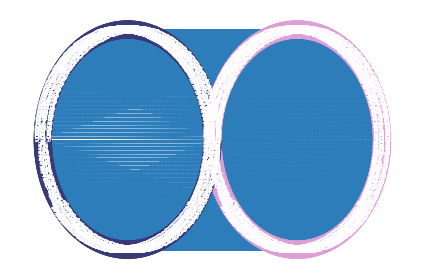

current_solve_helper 272.8281828459045


In [55]:
input = 'inputs/large120.in'

solvers = [solve, current_solve(input)]

for solver in solvers:
    G = read_input(input)

    k = solver(G)
    validate_output(G)
    visualize(G)
    print(solver.__name__, score(G))

# G = read_input('self_inputs/medium.in')
# max_k_cut_solve(9)(G)
# visualize(G)
# print(score(G))


In [26]:
# run(max_k_cut_solve(2), 'self_inputs/small.in', 'self_outputs/small.out')

In [56]:
# TODO: record the best solutions by only saving if the score is only than the previous best for that file
for _ in range(500):
    run_all(random_solve, 'inputs', 'outputs')

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67442.40862222019
inputs/small232.in: cost 99975.24939607034
inputs/large116.in: cost 122003.20710728243
inputs/large59.in: cost 113952.31591025766
inputs/small150.in: cost 227323.7738008533
inputs/large147.in: cost 679906.6121493861
inputs/small101.in: cost 341198.5478183665
inputs/small197.in: cost 322086.28397252137
inputs/small206.in: cost 80597.5478183665
inputs/large240.in: cost 731468.6121493861
inputs/medium7.in: cost 769604.25610169
inputs/small257.in: cost 322990.8702032812
inputs/large180.in: cost 657060.4086222202
inputs/large211.in: cost 716992.6121493861
inputs/small135.in: cost 478164.2493960704
inputs/small68.in: cost 188590.79776051317
inputs/medium249.in: cost 62694.20921347642
inputs/large173.in: cost 69571.31591025766
inputs/small164.in: cost 366892.1432152336
inputs/medium218.in: cost 69442.31591025766
inputs/medium189.in: cost 137285.55369231876
inputs/small39.in: cost 59196.5478183665
inputs/large122.in: cost 192009.6900202268
inputs/medi

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 95758.24939607034
inputs/small232.in: cost 95117.24939607034
inputs/large116.in: cost 139312.61214938603
inputs/large59.in: cost 146732.61214938603
inputs/small150.in: cost 330195.7977605132
inputs/large147.in: cost 715185.6121493861
inputs/small101.in: cost 409302.1432152336
inputs/small197.in: cost 228599.31591025766
inputs/small206.in: cost 113096.24939607034
inputs/large240.in: cost 579950.2071072825
inputs/medium7.in: cost 799233.4562993493
inputs/small257.in: cost 371177.12506384565
inputs/large180.in: cost 967952.6900202268
inputs/large211.in: cost 937322.2493960704
inputs/small135.in: cost 300298.5391960796
inputs/small68.in: cost 164870.79776051317
inputs/medium249.in: cost 83660.78632889136
inputs/large173.in: cost 73508.31591025766
inputs/small164.in: cost 440415.2493960704
inputs/medium218.in: cost 68642.31591025766
inputs/medium189.in: cost 93955.31591025766
inputs/small39.in: cost 71581.65392485766
inputs/large122.in: cost 131960.81500331443
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 66635.31591025766
inputs/small232.in: cost 61154.36969444755
inputs/large116.in: cost 105842.31591025766
inputs/large59.in: cost 130930.81500331442
inputs/small150.in: cost 240703.6457443617
inputs/large147.in: cost 1028285.2493960704
inputs/small101.in: cost 395775.1432152336
inputs/small197.in: cost 237757.78636752508
inputs/small206.in: cost 72292.78636752511
inputs/large240.in: cost 859166.6900202268
inputs/medium7.in: cost 986115.7863288914
inputs/small257.in: cost 523675.2493960704
inputs/large180.in: cost 787963.8150033144
inputs/large211.in: cost 542045.0687101044
inputs/small135.in: cost 277162.5717318357
inputs/small68.in: cost 126985.87020328126
inputs/medium249.in: cost 98683.24939607034
inputs/large173.in: cost 67783.20710728243
inputs/small164.in: cost 341833.7977605132
inputs/medium218.in: cost 74242.31591025766
inputs/medium189.in: cost 90940.31591025766
inputs/small39.in: cost 60460.31591025766
inputs/large122.in: cost 133460.81500331443
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 104955.24939607034
inputs/small232.in: cost 68506.53919607958
inputs/large116.in: cost 196219.24939607034
inputs/large59.in: cost 146802.61214938603
inputs/small150.in: cost 228823.41896328292
inputs/large147.in: cost 720718.6121493861
inputs/small101.in: cost 289355.36969444755
inputs/small197.in: cost 466732.2493960704
inputs/small206.in: cost 74710.78636752511
inputs/large240.in: cost 1045464.2493960704
inputs/medium7.in: cost 811474.2092134764
inputs/small257.in: cost 290635.0559795825
inputs/large180.in: cost 643231.3159102576
inputs/large211.in: cost 727626.6121493861
inputs/small135.in: cost 404031.1432152336
inputs/small68.in: cost 126459.60817510197
inputs/medium249.in: cost 57266.256101689985
inputs/large173.in: cost 52156.40862222018
inputs/small164.in: cost 259207.8702032813
inputs/medium218.in: cost 75112.78632889136
inputs/medium189.in: cost 98028.48413580413
inputs/small39.in: cost 57581.31591025766
inputs/large122.in: cost 220219.24939607034
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 78433.6900202268
inputs/small232.in: cost 64102.60817510197
inputs/large116.in: cost 196219.24939607034
inputs/large59.in: cost 115022.31591025766
inputs/small150.in: cost 203143.31591025766
inputs/large147.in: cost 640108.8150033144
inputs/small101.in: cost 315593.0570147277
inputs/small197.in: cost 450237.2493960704
inputs/small206.in: cost 115311.14321523352
inputs/large240.in: cost 511614.31591025763
inputs/medium7.in: cost 1169914.5536923187
inputs/small257.in: cost 262407.31591025763
inputs/large180.in: cost 694063.4086222202
inputs/large211.in: cost 838946.6900202268
inputs/small135.in: cost 276390.10420384805
inputs/small68.in: cost 116878.05701472767
inputs/medium249.in: cost 102477.24939607034
inputs/large173.in: cost 86697.61214938603
inputs/small164.in: cost 233918.60817510195
inputs/medium218.in: cost 114619.24939607034
inputs/medium189.in: cost 91258.25610169
inputs/small39.in: cost 63232.666394513275
inputs/large122.in: cost 141312.61214938603
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 88151.6900202268
inputs/small232.in: cost 63477.31591025766
inputs/large116.in: cost 120003.40862222019
inputs/large59.in: cost 169669.6900202268
inputs/small150.in: cost 199985.31591025766
inputs/large147.in: cost 610582.8150033144
inputs/small101.in: cost 386381.1432152336
inputs/small197.in: cost 464826.2493960704
inputs/small206.in: cost 102303.79776051317
inputs/large240.in: cost 639462.8150033144
inputs/medium7.in: cost 851818.5860090663
inputs/small257.in: cost 523648.2493960704
inputs/large180.in: cost 972689.6900202268
inputs/large211.in: cost 609913.8150033144
inputs/small135.in: cost 489090.2493960704
inputs/small68.in: cost 117314.87020328126
inputs/medium249.in: cost 70352.70061041453
inputs/large173.in: cost 95847.24939607034
inputs/small164.in: cost 259964.1863317996
inputs/medium218.in: cost 64242.31591025766
inputs/medium189.in: cost 97681.74973050374
inputs/small39.in: cost 73389.53919607958
inputs/large122.in: cost 116342.31591025766
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67180.61214938603
inputs/small232.in: cost 101475.24939607034
inputs/large116.in: cost 179219.24939607034
inputs/large59.in: cost 131000.81500331442
inputs/small150.in: cost 226812.05597958248
inputs/large147.in: cost 823127.6900202268
inputs/small101.in: cost 241378.31591025766
inputs/small197.in: cost 262481.0570147277
inputs/small206.in: cost 89948.12506384567
inputs/large240.in: cost 666338.8150033144
inputs/medium7.in: cost 1201065.5536923187
inputs/small257.in: cost 262538.31591025763
inputs/large180.in: cost 690769.2071072825
inputs/large211.in: cost 615796.8150033144
inputs/small135.in: cost 244756.31591025766
inputs/small68.in: cost 205151.24939607034
inputs/medium249.in: cost 94713.24939607034
inputs/large173.in: cost 100036.6900202268
inputs/small164.in: cost 301187.6539248577
inputs/medium218.in: cost 63862.20921347642
inputs/medium189.in: cost 88901.31591025766
inputs/small39.in: cost 81372.0883757614
inputs/large122.in: cost 168009.6900202268
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67208.81500331442
inputs/small232.in: cost 57800.31591025766
inputs/large116.in: cost 194219.24939607034
inputs/large59.in: cost 114922.31591025766
inputs/small150.in: cost 229839.1863317996
inputs/large147.in: cost 841404.6900202268
inputs/small101.in: cost 240609.31591025766
inputs/small197.in: cost 325914.0883757614
inputs/small206.in: cost 117859.24939607034
inputs/large240.in: cost 746893.6121493861
inputs/medium7.in: cost 781379.25610169
inputs/small257.in: cost 523961.2493960704
inputs/large180.in: cost 713763.2947146636
inputs/large211.in: cost 668781.6121493861
inputs/small135.in: cost 478426.2493960704
inputs/small68.in: cost 144171.65392485767
inputs/medium249.in: cost 82175.80459507313
inputs/large173.in: cost 67330.81500331442
inputs/small164.in: cost 244489.41405005808
inputs/medium218.in: cost 76062.20921347641
inputs/medium189.in: cost 98063.31591025766
inputs/small39.in: cost 97137.24939607034
inputs/large122.in: cost 147312.61214938603
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 95240.24939607034
inputs/small232.in: cost 67198.31591025766
inputs/large116.in: cost 153460.81500331443
inputs/large59.in: cost 130810.81500331442
inputs/small150.in: cost 208949.31591025766
inputs/large147.in: cost 811922.6378778446
inputs/small101.in: cost 486233.2493960704
inputs/small197.in: cost 366929.1432152336
inputs/small206.in: cost 87246.87020328126
inputs/large240.in: cost 738530.6121493861
inputs/medium7.in: cost 739172.1073402142
inputs/small257.in: cost 371448.12506384565
inputs/large180.in: cost 966484.6900202268
inputs/large211.in: cost 968615.2493960704
inputs/small135.in: cost 397297.1432152336
inputs/small68.in: cost 189731.79776051317
inputs/medium249.in: cost 55854.256101689985
inputs/large173.in: cost 83525.6900202268
inputs/small164.in: cost 261535.5391960796
inputs/medium218.in: cost 63662.20921347642
inputs/medium189.in: cost 90948.80459507313
inputs/small39.in: cost 75618.65392485766
inputs/large122.in: cost 115342.31591025766
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 85794.61214938603
inputs/small232.in: cost 65674.60817510197
inputs/large116.in: cost 190219.24939607034
inputs/large59.in: cost 114862.31591025766
inputs/small150.in: cost 283926.0883757614
inputs/large147.in: cost 813437.6900202268
inputs/small101.in: cost 338074.0883757614
inputs/small197.in: cost 355492.1432152336
inputs/small206.in: cost 131144.24939607034
inputs/large240.in: cost 527425.3159102576
inputs/medium7.in: cost 692500.3159102576
inputs/small257.in: cost 523976.2493960704
inputs/large180.in: cost 883874.6121493861
inputs/large211.in: cost 566907.1887001371
inputs/small135.in: cost 404417.1432152336
inputs/small68.in: cost 152470.28397252137
inputs/medium249.in: cost 67411.80459507313
inputs/large173.in: cost 71174.61214938603
inputs/small164.in: cost 271089.0570147277
inputs/medium218.in: cost 87009.55369231876
inputs/medium189.in: cost 92181.31591025766
inputs/small39.in: cost 87772.14321523352
inputs/large122.in: cost 164509.6900202268
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 89395.6900202268
inputs/small232.in: cost 55994.31591025766
inputs/large116.in: cost 103842.31591025766
inputs/large59.in: cost 113912.31591025766
inputs/small150.in: cost 210563.7738008533
inputs/large147.in: cost 546882.0687101044
inputs/small101.in: cost 290826.5391960796
inputs/small197.in: cost 229308.31591025766
inputs/small206.in: cost 132608.24939607034
inputs/large240.in: cost 756442.6121493861
inputs/medium7.in: cost 1442926.2493960704
inputs/small257.in: cost 262381.31591025763
inputs/large180.in: cost 779794.8150033144
inputs/large211.in: cost 818970.6900202268
inputs/small135.in: cost 302370.0570147277
inputs/small68.in: cost 194811.24939607034
inputs/medium249.in: cost 81866.78632889136
inputs/large173.in: cost 75417.61214938603
inputs/small164.in: cost 212547.31591025766
inputs/medium218.in: cost 74512.78632889136
inputs/medium189.in: cost 154721.24939607034
inputs/small39.in: cost 93115.24939607034
inputs/large122.in: cost 147812.61214938603
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 63225.40862222018
inputs/small232.in: cost 71464.14321523352
inputs/large116.in: cost 189219.24939607034
inputs/large59.in: cost 121323.40862222019
inputs/small150.in: cost 252768.5391960796
inputs/large147.in: cost 702487.6121493861
inputs/small101.in: cost 252928.31591025766
inputs/small197.in: cost 230234.31591025766
inputs/small206.in: cost 104527.14321523352
inputs/large240.in: cost 757236.6121493861
inputs/medium7.in: cost 806759.1073402142
inputs/small257.in: cost 262513.31591025763
inputs/large180.in: cost 640010.4086222202
inputs/large211.in: cost 611468.8150033144
inputs/small135.in: cost 491434.2493960704
inputs/small68.in: cost 123772.41896328294
inputs/medium249.in: cost 84327.55369231876
inputs/large173.in: cost 64682.81500331443
inputs/small164.in: cost 430722.2493960704
inputs/medium218.in: cost 72403.6478572415
inputs/medium189.in: cost 82557.31591025766
inputs/small39.in: cost 62410.31591025766
inputs/large122.in: cost 112842.31591025766
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 74653.04645082694
inputs/small232.in: cost 91368.24939607034
inputs/large116.in: cost 134460.81500331443
inputs/large59.in: cost 202309.24939607034
inputs/small150.in: cost 204180.31591025766
inputs/large147.in: cost 714107.6121493861
inputs/small101.in: cost 272970.6450586352
inputs/small197.in: cost 273551.8702032812
inputs/small206.in: cost 84657.65392485766
inputs/large240.in: cost 592835.1507392881
inputs/medium7.in: cost 913058.7497305038
inputs/small257.in: cost 434105.1432152336
inputs/large180.in: cost 692334.4086222202
inputs/large211.in: cost 498229.31591025763
inputs/small135.in: cost 277473.7863675251
inputs/small68.in: cost 218096.24939607034
inputs/medium249.in: cost 70412.25610169
inputs/large173.in: cost 59373.31591025766
inputs/small164.in: cost 228046.31591025766
inputs/medium218.in: cost 67203.80459507313
inputs/medium189.in: cost 92839.70061041453
inputs/small39.in: cost 69447.64574436173
inputs/large122.in: cost 123503.40862222019
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 79959.61214938603
inputs/small232.in: cost 103727.24939607034
inputs/large116.in: cost 111460.81500331442
inputs/large59.in: cost 167659.63787784462
inputs/small150.in: cost 210867.46918416806
inputs/large147.in: cost 573940.1507392881
inputs/small101.in: cost 302954.8702032812
inputs/small197.in: cost 260219.60817510195
inputs/small206.in: cost 81060.36969444754
inputs/large240.in: cost 646280.8150033144
inputs/medium7.in: cost 696002.3159102576
inputs/small257.in: cost 262248.31591025763
inputs/large180.in: cost 1217985.2493960704
inputs/large211.in: cost 538373.2071072825
inputs/small135.in: cost 409065.1432152336
inputs/small68.in: cost 183704.14321523352
inputs/medium249.in: cost 83632.31591025766
inputs/large173.in: cost 102294.24939607034
inputs/small164.in: cost 416407.2493960704
inputs/medium218.in: cost 67403.80459507313
inputs/medium189.in: cost 128193.55369231876
inputs/small39.in: cost 103448.24939607034
inputs/large122.in: cost 163812.61214938603


  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 68442.61214938603
inputs/small232.in: cost 70561.53919607958
inputs/large116.in: cost 178009.6900202268
inputs/large59.in: cost 115132.31591025766
inputs/small150.in: cost 289916.5478183665
inputs/large147.in: cost 572425.4086222202
inputs/small101.in: cost 267272.0559795825
inputs/small197.in: cost 231564.31591025766
inputs/small206.in: cost 64629.31591025766
inputs/large240.in: cost 1021400.2493960704
inputs/medium7.in: cost 1178168.5536923187
inputs/small257.in: cost 371276.12506384565
inputs/large180.in: cost 993117.6900202268
inputs/large211.in: cost 552930.1507392881
inputs/small135.in: cost 301959.8702032812
inputs/small68.in: cost 127938.87020328126
inputs/medium249.in: cost 132975.24939607034
inputs/large173.in: cost 64555.81500331443
inputs/small164.in: cost 226010.31591025766
inputs/medium218.in: cost 82912.78632889136
inputs/medium189.in: cost 97005.80459507313
inputs/small39.in: cost 89509.5478183665
inputs/large122.in: cost 136960.81500331443
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 60733.29471466365
inputs/small232.in: cost 104312.24939607034
inputs/large116.in: cost 157009.6900202268
inputs/large59.in: cost 201409.24939607034
inputs/small150.in: cost 247193.8702032813
inputs/large147.in: cost 1008988.2493960704
inputs/small101.in: cost 395868.1432152336
inputs/small197.in: cost 388585.7977605132
inputs/small206.in: cost 70946.53919607958
inputs/large240.in: cost 834941.6900202268
inputs/medium7.in: cost 1193869.5536923187
inputs/small257.in: cost 433735.1432152336
inputs/large180.in: cost 645878.2071072825
inputs/large211.in: cost 554348.1507392881
inputs/small135.in: cost 480915.2493960704
inputs/small68.in: cost 121510.99249281183
inputs/medium249.in: cost 83454.78632889136
inputs/large173.in: cost 70563.81500331442
inputs/small164.in: cost 416159.2493960704
inputs/medium218.in: cost 75642.31591025766
inputs/medium189.in: cost 153720.24939607034
inputs/small39.in: cost 70816.12506384567
inputs/large122.in: cost 164009.6900202268
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 68724.61214938603
inputs/small232.in: cost 91058.24939607034
inputs/large116.in: cost 155312.61214938603
inputs/large59.in: cost 146832.61214938603
inputs/small150.in: cost 262306.0570147277
inputs/large147.in: cost 1036370.2493960704
inputs/small101.in: cost 483186.2493960704
inputs/small197.in: cost 443720.2493960704
inputs/small206.in: cost 81473.31591025766
inputs/large240.in: cost 739533.6121493861
inputs/medium7.in: cost 1178475.5536923187
inputs/small257.in: cost 523847.2493960704
inputs/large180.in: cost 649525.3159102576
inputs/large211.in: cost 992709.2493960704
inputs/small135.in: cost 269122.608175102
inputs/small68.in: cost 179466.14321523352
inputs/medium249.in: cost 81454.78632889136
inputs/large173.in: cost 84015.6900202268
inputs/small164.in: cost 302839.6539248577
inputs/medium218.in: cost 66062.20921347641
inputs/medium189.in: cost 117079.78632889136
inputs/small39.in: cost 66156.65392485766
inputs/large122.in: cost 126960.81500331442
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 64986.61214938603
inputs/small232.in: cost 75426.5478183665
inputs/large116.in: cost 196219.24939607034
inputs/large59.in: cost 170049.63787784462
inputs/small150.in: cost 223420.10420384802
inputs/large147.in: cost 571617.4086222202
inputs/small101.in: cost 261228.60817510195
inputs/small197.in: cost 371121.1432152336
inputs/small206.in: cost 78115.60817510197
inputs/large240.in: cost 645738.8150033144
inputs/medium7.in: cost 771911.25610169
inputs/small257.in: cost 262313.31591025763
inputs/large180.in: cost 650742.0232292542
inputs/large211.in: cost 597099.8150033144
inputs/small135.in: cost 401877.1432152336
inputs/small68.in: cost 146590.20038610406
inputs/medium249.in: cost 92477.24939607034
inputs/large173.in: cost 59657.31591025766
inputs/small164.in: cost 263788.5391960796
inputs/medium218.in: cost 71462.20921347641
inputs/medium189.in: cost 101185.31591025766
inputs/small39.in: cost 58415.31591025766
inputs/large122.in: cost 133842.31591025766
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 74441.81500331442
inputs/small232.in: cost 67679.36969444754
inputs/large116.in: cost 195219.24939607034
inputs/large59.in: cost 121123.29471466366
inputs/small150.in: cost 221476.60817510195
inputs/large147.in: cost 695421.6121493861
inputs/small101.in: cost 249825.31591025766
inputs/small197.in: cost 264763.0570147277
inputs/small206.in: cost 66084.31591025766
inputs/large240.in: cost 603126.1507392881
inputs/medium7.in: cost 1463453.2493960704
inputs/small257.in: cost 374717.0883757614
inputs/large180.in: cost 731942.1507392881
inputs/large211.in: cost 625317.8150033144
inputs/small135.in: cost 397523.7977605132
inputs/small68.in: cost 162519.0883757614
inputs/medium249.in: cost 102679.55369231876
inputs/large173.in: cost 89401.6900202268
inputs/small164.in: cost 361360.1432152336
inputs/medium218.in: cost 68842.31591025766
inputs/medium189.in: cost 108541.20921347641
inputs/small39.in: cost 92782.24939607034
inputs/large122.in: cost 163009.63787784462
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 78559.6900202268
inputs/small232.in: cost 64107.31591025766
inputs/large116.in: cost 112842.31591025766
inputs/large59.in: cost 201369.24939607034
inputs/small150.in: cost 249333.36969444755
inputs/large147.in: cost 500591.31591025763
inputs/small101.in: cost 472922.2493960704
inputs/small197.in: cost 292427.0570147277
inputs/small206.in: cost 81885.87020328126
inputs/large240.in: cost 1044815.2493960704
inputs/medium7.in: cost 1362569.2493960704
inputs/small257.in: cost 371395.12506384565
inputs/large180.in: cost 1019525.6900202268
inputs/large211.in: cost 552740.2071072825
inputs/small135.in: cost 245023.31591025766
inputs/small68.in: cost 213326.24939607034
inputs/medium249.in: cost 105331.24939607034
inputs/large173.in: cost 62696.40862222018
inputs/small164.in: cost 267822.5391960796
inputs/medium218.in: cost 61042.31591025766
inputs/medium189.in: cost 116709.78632889136
inputs/small39.in: cost 57631.31591025766
inputs/large122.in: cost 141812.61214938603


  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 113214.24939607034
inputs/small232.in: cost 68419.31591025766
inputs/large116.in: cost 101460.81500331442
inputs/large59.in: cost 146852.61214938603
inputs/small150.in: cost 284788.6539248577
inputs/large147.in: cost 619727.8150033144
inputs/small101.in: cost 258241.78636752508
inputs/small197.in: cost 333609.12506384565
inputs/small206.in: cost 120898.24939607034
inputs/large240.in: cost 740581.6121493861
inputs/medium7.in: cost 871791.2092134764
inputs/small257.in: cost 370958.28397252137
inputs/large180.in: cost 729404.2947146636
inputs/large211.in: cost 661688.6121493861
inputs/small135.in: cost 347036.28397252137
inputs/small68.in: cost 127215.87020328126
inputs/medium249.in: cost 70588.70061041453
inputs/large173.in: cost 65299.31591025766
inputs/small164.in: cost 425368.2493960704
inputs/medium218.in: cost 80112.78632889136
inputs/medium189.in: cost 95002.80459507313
inputs/small39.in: cost 58901.057014727674
inputs/large122.in: cost 134960.81500331443
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 85173.6900202268
inputs/small232.in: cost 79965.28397252137
inputs/large116.in: cost 117003.11092552818
inputs/large59.in: cost 130690.81500331442
inputs/small150.in: cost 217879.78636752508
inputs/large147.in: cost 507204.31591025763
inputs/small101.in: cost 487002.2493960704
inputs/small197.in: cost 302710.28397252137
inputs/small206.in: cost 105429.14321523352
inputs/large240.in: cost 657653.8150033144
inputs/medium7.in: cost 982490.7863288914
inputs/small257.in: cost 371362.12506384565
inputs/large180.in: cost 784126.8150033144
inputs/large211.in: cost 603769.8150033144
inputs/small135.in: cost 346539.12506384565
inputs/small68.in: cost 140445.65392485767
inputs/medium249.in: cost 97600.78632889136
inputs/large173.in: cost 69146.81500331442
inputs/small164.in: cost 420721.2493960704
inputs/medium218.in: cost 74712.78632889136
inputs/medium189.in: cost 112051.78632889136
inputs/small39.in: cost 76754.31591025766
inputs/large122.in: cost 122503.1507392881
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 66358.40862222019
inputs/small232.in: cost 65779.05701472767
inputs/large116.in: cost 140460.81500331443
inputs/large59.in: cost 130920.81500331442
inputs/small150.in: cost 227688.1863317996
inputs/large147.in: cost 994893.2493960704
inputs/small101.in: cost 237662.31591025766
inputs/small197.in: cost 469058.2493960704
inputs/small206.in: cost 111238.14321523352
inputs/large240.in: cost 858055.6900202268
inputs/medium7.in: cost 770165.7006104145
inputs/small257.in: cost 433724.1432152336
inputs/large180.in: cost 643011.3159102576
inputs/large211.in: cost 830218.6900202268
inputs/small135.in: cost 291722.5391960796
inputs/small68.in: cost 202610.24939607034
inputs/medium249.in: cost 98829.24939607034
inputs/large173.in: cost 80734.6900202268
inputs/small164.in: cost 226045.31591025766
inputs/medium218.in: cost 79912.78632889136
inputs/medium189.in: cost 135067.55369231876
inputs/small39.in: cost 61256.31591025766
inputs/large122.in: cost 206219.24939607034
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 76992.61214938603
inputs/small232.in: cost 90104.14321523352
inputs/large116.in: cost 161009.6900202268
inputs/large59.in: cost 114752.31591025766
inputs/small150.in: cost 317837.1432152336
inputs/large147.in: cost 1022065.2493960704
inputs/small101.in: cost 240308.31591025766
inputs/small197.in: cost 380835.1432152336
inputs/small206.in: cost 108985.14321523352
inputs/large240.in: cost 529161.3159102576
inputs/medium7.in: cost 1450441.2493960704
inputs/small257.in: cost 370029.6539248577
inputs/large180.in: cost 1057776.6900202269
inputs/large211.in: cost 717968.6121493861
inputs/small135.in: cost 350392.12506384565
inputs/small68.in: cost 185871.14321523352
inputs/medium249.in: cost 73102.78632889136
inputs/large173.in: cost 59971.31591025766
inputs/small164.in: cost 432464.2493960704
inputs/medium218.in: cost 65642.31591025766
inputs/medium189.in: cost 120532.55369231876
inputs/small39.in: cost 75385.14321523352
inputs/large122.in: cost 151312.61214938603
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 98932.24939607034
inputs/small232.in: cost 59126.31591025766
inputs/large116.in: cost 206219.24939607034
inputs/large59.in: cost 201399.24939607034
inputs/small150.in: cost 400628.2493960704
inputs/large147.in: cost 851453.6900202268
inputs/small101.in: cost 343232.6539248577
inputs/small197.in: cost 324714.28397252137
inputs/small206.in: cost 105034.79776051317
inputs/large240.in: cost 666950.8150033144
inputs/medium7.in: cost 1136875.5536923187
inputs/small257.in: cost 433862.1432152336
inputs/large180.in: cost 867721.6121493861
inputs/large211.in: cost 510042.31591025763
inputs/small135.in: cost 476858.2493960704
inputs/small68.in: cost 113830.31591025766
inputs/medium249.in: cost 78809.74973050374
inputs/large173.in: cost 67586.40862222019
inputs/small164.in: cost 250153.60817510195
inputs/medium218.in: cost 69442.31591025766
inputs/medium189.in: cost 133502.55369231876
inputs/small39.in: cost 99491.24939607034
inputs/large122.in: cost 117342.31591025766
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 70425.29471466366
inputs/small232.in: cost 54423.31591025766
inputs/large116.in: cost 144003.1507392881
inputs/large59.in: cost 130860.81500331442
inputs/small150.in: cost 229524.5717318357
inputs/large147.in: cost 627116.8150033144
inputs/small101.in: cost 281961.18633179966
inputs/small197.in: cost 285441.5391960796
inputs/small206.in: cost 80550.05701472767
inputs/large240.in: cost 655197.8150033144
inputs/medium7.in: cost 702284.3159102576
inputs/small257.in: cost 325711.5391960796
inputs/large180.in: cost 663411.3159102576
inputs/large211.in: cost 673873.6121493861
inputs/small135.in: cost 396735.1432152336
inputs/small68.in: cost 124251.64505863519
inputs/medium249.in: cost 71663.74973050374
inputs/large173.in: cost 63696.81500331443
inputs/small164.in: cost 429438.2493960704
inputs/medium218.in: cost 67204.10734021418
inputs/medium189.in: cost 121018.78632889136
inputs/small39.in: cost 60918.31591025766
inputs/large122.in: cost 125503.20710728243
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 104951.24939607034
inputs/small232.in: cost 60291.36969444755
inputs/large116.in: cost 148460.81500331443
inputs/large59.in: cost 202439.24939607034
inputs/small150.in: cost 254511.5391960796
inputs/large147.in: cost 520302.31591025763
inputs/small101.in: cost 264404.608175102
inputs/small197.in: cost 228953.31591025766
inputs/small206.in: cost 109763.14321523352
inputs/large240.in: cost 855195.6900202268
inputs/medium7.in: cost 807186.1073402142
inputs/small257.in: cost 371196.12506384565
inputs/large180.in: cost 620517.3159102576
inputs/large211.in: cost 778451.6900202268
inputs/small135.in: cost 300572.0570147277
inputs/small68.in: cost 124026.7738008533
inputs/medium249.in: cost 87454.78632889136
inputs/large173.in: cost 66656.06871010445
inputs/small164.in: cost 420614.2493960704
inputs/medium218.in: cost 66004.10734021418
inputs/medium189.in: cost 94959.6478572415
inputs/small39.in: cost 105226.24939607034
inputs/large122.in: cost 126460.81500331442
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67000.61214938603
inputs/small232.in: cost 73933.14321523352
inputs/large116.in: cost 179009.6900202268
inputs/large59.in: cost 114992.31591025766
inputs/small150.in: cost 205094.31591025766
inputs/large147.in: cost 1017388.2493960704
inputs/small101.in: cost 348076.28397252137
inputs/small197.in: cost 307011.28397252137
inputs/small206.in: cost 77198.31591025766
inputs/large240.in: cost 648495.8150033144
inputs/medium7.in: cost 1002287.7863288914
inputs/small257.in: cost 325638.5391960796
inputs/large180.in: cost 668327.9729744445
inputs/large211.in: cost 503010.31591025763
inputs/small135.in: cost 299583.5391960796
inputs/small68.in: cost 148595.12506384568
inputs/medium249.in: cost 93859.24939607034
inputs/large173.in: cost 62290.31591025766
inputs/small164.in: cost 359887.7977605132
inputs/medium218.in: cost 87009.55369231876
inputs/medium189.in: cost 156088.24939607034
inputs/small39.in: cost 51909.645744361726
inputs/large122.in: cost 121003.29471466366
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 59031.40862222018
inputs/small232.in: cost 55646.31591025766
inputs/large116.in: cost 135312.61214938603
inputs/large59.in: cost 146992.61214938603
inputs/small150.in: cost 329630.1432152336
inputs/large147.in: cost 717949.6121493861
inputs/small101.in: cost 338696.5478183665
inputs/small197.in: cost 451965.2493960704
inputs/small206.in: cost 114086.79776051317
inputs/large240.in: cost 747786.6121493861
inputs/medium7.in: cost 1040689.7863288914
inputs/small257.in: cost 434043.1432152336
inputs/large180.in: cost 948742.6121493861
inputs/large211.in: cost 989155.2493960704
inputs/small135.in: cost 245321.31591025766
inputs/small68.in: cost 112400.31591025766
inputs/medium249.in: cost 87338.20921347641
inputs/large173.in: cost 87089.61214938603
inputs/small164.in: cost 298759.0883757614
inputs/medium218.in: cost 106019.24939607034
inputs/medium189.in: cost 133402.55369231876
inputs/small39.in: cost 71039.64505863519
inputs/large122.in: cost 118003.29471466366
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 95966.24939607034
inputs/small232.in: cost 90861.24939607034
inputs/large116.in: cost 170009.6900202268
inputs/large59.in: cost 170039.6900202268
inputs/small150.in: cost 236221.05597958248
inputs/large147.in: cost 579997.4086222202
inputs/small101.in: cost 296857.8702032812
inputs/small197.in: cost 234471.31591025766
inputs/small206.in: cost 105671.5478183665
inputs/large240.in: cost 864481.6900202268
inputs/medium7.in: cost 991462.7863288914
inputs/small257.in: cost 433913.1432152336
inputs/large180.in: cost 647262.0687101044
inputs/large211.in: cost 691106.6121493861
inputs/small135.in: cost 478542.2493960704
inputs/small68.in: cost 151821.12506384568
inputs/medium249.in: cost 78632.31591025766
inputs/large173.in: cost 72519.81500331442
inputs/small164.in: cost 356327.7977605132
inputs/medium218.in: cost 65061.74973050374
inputs/medium189.in: cost 138872.55369231876
inputs/small39.in: cost 55894.87020328127
inputs/large122.in: cost 174509.6900202268
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 69490.1507392881
inputs/small232.in: cost 64494.31591025766
inputs/large116.in: cost 152312.61214938603
inputs/large59.in: cost 146902.61214938603
inputs/small150.in: cost 290983.28397252137
inputs/large147.in: cost 511452.31591025763
inputs/small101.in: cost 277645.6450586352
inputs/small197.in: cost 223066.31591025766
inputs/small206.in: cost 76272.05701472767
inputs/large240.in: cost 517103.31591025763
inputs/medium7.in: cost 1208444.5536923187
inputs/small257.in: cost 289608.7738008533
inputs/large180.in: cost 885440.6121493861
inputs/large211.in: cost 505887.31591025763
inputs/small135.in: cost 303909.0570147277
inputs/small68.in: cost 202459.24939607034
inputs/medium249.in: cost 90919.24939607034
inputs/large173.in: cost 106485.24939607034
inputs/small164.in: cost 224068.31591025766
inputs/medium218.in: cost 78712.78632889136
inputs/medium189.in: cost 147977.24939607034
inputs/small39.in: cost 80397.14321523352
inputs/large122.in: cost 184719.24939607034


  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 81014.6900202268
inputs/small232.in: cost 68183.0883757614
inputs/large116.in: cost 111842.31591025766
inputs/large59.in: cost 170049.6900202268
inputs/small150.in: cost 247369.8702032813
inputs/large147.in: cost 517022.31591025763
inputs/small101.in: cost 402792.1432152336
inputs/small197.in: cost 269494.36969444755
inputs/small206.in: cost 78610.66639451329
inputs/large240.in: cost 868559.6900202268
inputs/medium7.in: cost 985660.7863288914
inputs/small257.in: cost 433777.1432152336
inputs/large180.in: cost 943003.6900202268
inputs/large211.in: cost 746139.6121493861
inputs/small135.in: cost 244990.31591025766
inputs/small68.in: cost 133154.36969444755
inputs/medium249.in: cost 88121.55369231876
inputs/large173.in: cost 69186.13109308256
inputs/small164.in: cost 302467.0883757614
inputs/medium218.in: cost 83209.55369231876
inputs/medium189.in: cost 165525.24939607034
inputs/small39.in: cost 76476.79776051317
inputs/large122.in: cost 207719.24939607034
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 75244.24939607034
inputs/small232.in: cost 57684.31591025766
inputs/large116.in: cost 118312.61214938603
inputs/large59.in: cost 146952.61214938603
inputs/small150.in: cost 203658.31591025766
inputs/large147.in: cost 804041.6900202268
inputs/small101.in: cost 484300.2493960704
inputs/small197.in: cost 274317.36969444755
inputs/small206.in: cost 67274.31591025766
inputs/large240.in: cost 1034674.2493960704
inputs/medium7.in: cost 1184063.5536923187
inputs/small257.in: cost 523611.2493960704
inputs/large180.in: cost 646391.2947146636
inputs/large211.in: cost 967564.2493960704
inputs/small135.in: cost 349877.5478183665
inputs/small68.in: cost 107521.31591025766
inputs/medium249.in: cost 78838.31591025766
inputs/large173.in: cost 89926.6900202268
inputs/small164.in: cost 308981.12506384565
inputs/medium218.in: cost 75442.31591025766
inputs/medium189.in: cost 148672.24939607034
inputs/small39.in: cost 67290.05701472767
inputs/large122.in: cost 169509.6900202268
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 63678.31591025766
inputs/small232.in: cost 73300.14321523352
inputs/large116.in: cost 130003.20710728243
inputs/large59.in: cost 131070.81500331442
inputs/small150.in: cost 399005.2493960704
inputs/large147.in: cost 819761.6900202268
inputs/small101.in: cost 392083.1432152336
inputs/small197.in: cost 276032.5061018658
inputs/small206.in: cost 126037.24939607034
inputs/large240.in: cost 663968.8150033144
inputs/medium7.in: cost 1136593.5536923187
inputs/small257.in: cost 433831.1432152336
inputs/large180.in: cost 1237306.2493960704
inputs/large211.in: cost 921605.2493960704
inputs/small135.in: cost 268176.6663945133
inputs/small68.in: cost 206161.24939607034
inputs/medium249.in: cost 74663.74973050374
inputs/large173.in: cost 111854.24939607034
inputs/small164.in: cost 424577.2493960704
inputs/medium218.in: cost 89009.55369231876
inputs/medium189.in: cost 107238.25610169
inputs/small39.in: cost 87235.36969444754
inputs/large122.in: cost 131842.31591025766
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67232.61214938603
inputs/small232.in: cost 59385.645744361726
inputs/large116.in: cost 112842.31591025766
inputs/large59.in: cost 169829.6900202268
inputs/small150.in: cost 212157.31591025766
inputs/large147.in: cost 1010679.2493960704
inputs/small101.in: cost 273114.10420384805
inputs/small197.in: cost 388812.1432152336
inputs/small206.in: cost 77544.7738008533
inputs/large240.in: cost 857580.6900202268
inputs/medium7.in: cost 1012432.7863288914
inputs/small257.in: cost 323669.0570147277
inputs/large180.in: cost 738108.8150033144
inputs/large211.in: cost 849942.6900202268
inputs/small135.in: cost 243311.31591025766
inputs/small68.in: cost 112902.31591025766
inputs/medium249.in: cost 87454.78632889136
inputs/large173.in: cost 77243.61214938603
inputs/small164.in: cost 421427.2493960704
inputs/medium218.in: cost 65442.31591025766
inputs/medium189.in: cost 175875.24939607034
inputs/small39.in: cost 68973.65392485766
inputs/large122.in: cost 139960.81500331443
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 92747.24939607034
inputs/small232.in: cost 71997.0883757614
inputs/large116.in: cost 179009.6900202268
inputs/large59.in: cost 121253.20710728243
inputs/small150.in: cost 213487.60817510195
inputs/large147.in: cost 567167.1507392881
inputs/small101.in: cost 272855.18633179966
inputs/small197.in: cost 460040.2493960704
inputs/small206.in: cost 91819.5478183665
inputs/large240.in: cost 563822.1310930826
inputs/medium7.in: cost 717087.3159102576
inputs/small257.in: cost 433873.1432152336
inputs/large180.in: cost 684177.2071072825
inputs/large211.in: cost 590255.8150033144
inputs/small135.in: cost 236708.31591025766
inputs/small68.in: cost 116496.78636752511
inputs/medium249.in: cost 107653.24939607034
inputs/large173.in: cost 68944.61214938603
inputs/small164.in: cost 241057.66639451328
inputs/medium218.in: cost 107019.24939607034
inputs/medium189.in: cost 104860.25610169
inputs/small39.in: cost 94854.79776051317
inputs/large122.in: cost 108003.06871010445
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 69948.31591025766
inputs/small232.in: cost 100566.24939607034
inputs/large116.in: cost 131460.81500331443
inputs/large59.in: cost 130850.81500331442
inputs/small150.in: cost 197298.31591025766
inputs/large147.in: cost 717556.6121493861
inputs/small101.in: cost 391367.7977605132
inputs/small197.in: cost 384052.1432152336
inputs/small206.in: cost 52312.31591025766
inputs/large240.in: cost 648197.8150033144
inputs/medium7.in: cost 1424826.2493960704
inputs/small257.in: cost 433873.1432152336
inputs/large180.in: cost 1032630.6900202268
inputs/large211.in: cost 950042.2493960704
inputs/small135.in: cost 485483.2493960704
inputs/small68.in: cost 189918.24939607034
inputs/medium249.in: cost 84573.74973050374
inputs/large173.in: cost 66546.61214938603
inputs/small164.in: cost 253662.5391960796
inputs/medium218.in: cost 68404.10734021418
inputs/medium189.in: cost 172010.24939607034
inputs/small39.in: cost 67062.05701472767
inputs/large122.in: cost 174009.6900202268
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 63862.31591025766
inputs/small232.in: cost 75191.12506384567
inputs/large116.in: cost 214219.24939607034
inputs/large59.in: cost 166879.6900202268
inputs/small150.in: cost 400355.2493960704
inputs/large147.in: cost 494192.31591025763
inputs/small101.in: cost 274115.608175102
inputs/small197.in: cost 280880.0570147277
inputs/small206.in: cost 73446.99249281183
inputs/large240.in: cost 1055682.2493960704
inputs/medium7.in: cost 1160434.5536923187
inputs/small257.in: cost 372404.5478183665
inputs/large180.in: cost 649194.3159102576
inputs/large211.in: cost 814999.6900202268
inputs/small135.in: cost 347188.12506384565
inputs/small68.in: cost 209091.24939607034
inputs/medium249.in: cost 76382.25610169
inputs/large173.in: cost 73558.81500331442
inputs/small164.in: cost 300088.12506384565
inputs/medium218.in: cost 62242.31591025766
inputs/medium189.in: cost 102349.20921347641
inputs/small39.in: cost 65207.65392485767
inputs/large122.in: cost 143960.81500331443
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 100669.24939607034
inputs/small232.in: cost 61556.666394513275
inputs/large116.in: cost 122842.31591025766
inputs/large59.in: cost 114072.31591025766
inputs/small150.in: cost 295150.0883757614
inputs/large147.in: cost 750560.6121493861
inputs/small101.in: cost 490727.2493960704
inputs/small197.in: cost 324182.28397252137
inputs/small206.in: cost 72927.05701472767
inputs/large240.in: cost 1024275.2493960704
inputs/medium7.in: cost 881515.2092134764
inputs/small257.in: cost 524009.2493960704
inputs/large180.in: cost 715720.2947146636
inputs/large211.in: cost 629774.8150033144
inputs/small135.in: cost 483189.2493960704
inputs/small68.in: cost 118445.31591025766
inputs/medium249.in: cost 60104.31591025766
inputs/large173.in: cost 60173.1507392881
inputs/small164.in: cost 266330.5391960796
inputs/medium218.in: cost 66804.70061041453
inputs/medium189.in: cost 105592.20921347641
inputs/small39.in: cost 63329.41896328293
inputs/large122.in: cost 123342.31591025766
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 72977.61214938603
inputs/small232.in: cost 99005.24939607034
inputs/large116.in: cost 211219.24939607034
inputs/large59.in: cost 169759.6900202268
inputs/small150.in: cost 403469.2493960704
inputs/large147.in: cost 527194.3159102576
inputs/small101.in: cost 391757.1432152336
inputs/small197.in: cost 265523.64574436174
inputs/small206.in: cost 89102.65392485766
inputs/large240.in: cost 1053337.2493960704
inputs/medium7.in: cost 1168372.5536923187
inputs/small257.in: cost 433750.1432152336
inputs/large180.in: cost 740655.8150033144
inputs/large211.in: cost 690839.6121493861
inputs/small135.in: cost 401510.1432152336
inputs/small68.in: cost 132779.05701472767
inputs/medium249.in: cost 77280.31591025766
inputs/large173.in: cost 65861.29471466366
inputs/small164.in: cost 227036.31591025766
inputs/medium218.in: cost 78609.55369231876
inputs/medium189.in: cost 95024.45629934926
inputs/small39.in: cost 66177.5478183665
inputs/large122.in: cost 133460.81500331443
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 68932.81500331442
inputs/small232.in: cost 80605.5478183665
inputs/large116.in: cost 140460.81500331443
inputs/large59.in: cost 202289.24939607034
inputs/small150.in: cost 289348.28397252137
inputs/large147.in: cost 995536.2493960704
inputs/small101.in: cost 337451.12506384565
inputs/small197.in: cost 223731.31591025766
inputs/small206.in: cost 95362.14321523352
inputs/large240.in: cost 844539.6900202268
inputs/medium7.in: cost 807658.4841358041
inputs/small257.in: cost 322847.8702032812
inputs/large180.in: cost 982947.6900202268
inputs/large211.in: cost 829111.6378778446
inputs/small135.in: cost 405893.1432152336
inputs/small68.in: cost 109266.31591025766
inputs/medium249.in: cost 78633.40967307265
inputs/large173.in: cost 101505.24939607034
inputs/small164.in: cost 207871.31591025766
inputs/medium218.in: cost 63604.70061041451
inputs/medium189.in: cost 165442.24939607034
inputs/small39.in: cost 68658.12506384567
inputs/large122.in: cost 130460.81500331442
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 63908.29471466365
inputs/small232.in: cost 65428.53919607959
inputs/large116.in: cost 121003.20710728243
inputs/large59.in: cost 146942.61214938603
inputs/small150.in: cost 327013.1432152336
inputs/large147.in: cost 708938.6121493861
inputs/small101.in: cost 406506.7977605132
inputs/small197.in: cost 257742.78636752508
inputs/small206.in: cost 128158.24939607034
inputs/large240.in: cost 859500.6900202268
inputs/medium7.in: cost 961489.7863288914
inputs/small257.in: cost 288925.9924928118
inputs/large180.in: cost 660891.1310930826
inputs/large211.in: cost 591528.8150033144
inputs/small135.in: cost 273693.64574436174
inputs/small68.in: cost 115826.46918416806
inputs/medium249.in: cost 68824.10734021418
inputs/large173.in: cost 79007.81500331442
inputs/small164.in: cost 308419.20038610406
inputs/medium218.in: cost 107019.24939607034
inputs/medium189.in: cost 87143.31591025766
inputs/small39.in: cost 91566.14321523352
inputs/large122.in: cost 112960.81500331442
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 66248.61214938603
inputs/small232.in: cost 64586.5478183665
inputs/large116.in: cost 153460.81500331443
inputs/large59.in: cost 121193.20710728243
inputs/small150.in: cost 344510.7977605132
inputs/large147.in: cost 804873.6378778446
inputs/small101.in: cost 383822.1432152336
inputs/small197.in: cost 444729.2493960704
inputs/small206.in: cost 116928.79776051317
inputs/large240.in: cost 578085.2947146636
inputs/medium7.in: cost 716104.3159102576
inputs/small257.in: cost 523763.2493960704
inputs/large180.in: cost 685140.4086222202
inputs/large211.in: cost 643454.8150033144
inputs/small135.in: cost 300208.0570147277
inputs/small68.in: cost 143576.12506384568
inputs/medium249.in: cost 84634.20921347641
inputs/large173.in: cost 105478.24939607034
inputs/small164.in: cost 306418.5478183665
inputs/medium218.in: cost 85009.55369231876
inputs/medium189.in: cost 88965.80459507313
inputs/small39.in: cost 75423.14321523352
inputs/large122.in: cost 136460.81500331443
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 86162.6900202268
inputs/small232.in: cost 83927.24939607034
inputs/large116.in: cost 127842.31591025766
inputs/large59.in: cost 121013.40862222019
inputs/small150.in: cost 238908.36969444755
inputs/large147.in: cost 572310.0687101044
inputs/small101.in: cost 263896.7863675251
inputs/small197.in: cost 447544.2493960704
inputs/small206.in: cost 88481.14321523352
inputs/large240.in: cost 748815.6121493861
inputs/medium7.in: cost 695015.3159102576
inputs/small257.in: cost 433883.1432152336
inputs/large180.in: cost 695546.1109255282
inputs/large211.in: cost 615505.8150033144
inputs/small135.in: cost 304557.5391960796
inputs/small68.in: cost 107216.31591025766
inputs/medium249.in: cost 83424.78632889136
inputs/large173.in: cost 91390.6900202268
inputs/small164.in: cost 309126.20038610406
inputs/medium218.in: cost 76442.31591025766
inputs/medium189.in: cost 99614.20921347641
inputs/small39.in: cost 99157.24939607034
inputs/large122.in: cost 159009.6900202268
inputs/me

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 65405.81500331443
inputs/small232.in: cost 103595.24939607034
inputs/large116.in: cost 134003.40862222016
inputs/large59.in: cost 118373.02322925419
inputs/small150.in: cost 392849.2493960704
inputs/large147.in: cost 1019847.2493960704
inputs/small101.in: cost 466966.2493960704
inputs/small197.in: cost 255071.1863317996
inputs/small206.in: cost 121430.24939607034
inputs/large240.in: cost 524616.3159102576
inputs/medium7.in: cost 771995.8045950731
inputs/small257.in: cost 523947.2493960704
inputs/large180.in: cost 646525.3159102576
inputs/large211.in: cost 957559.2493960704
inputs/small135.in: cost 270029.608175102
inputs/small68.in: cost 144266.5478183665
inputs/medium249.in: cost 79428.20921347641
inputs/large173.in: cost 94415.24939607034
inputs/small164.in: cost 372064.1432152336
inputs/medium218.in: cost 78809.55369231876
inputs/medium189.in: cost 157246.24939607034
inputs/small39.in: cost 75747.20038610406
inputs/large122.in: cost 126460.81500331442
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 100569.24939607034
inputs/small232.in: cost 86067.14321523352
inputs/large116.in: cost 175219.24939607034
inputs/large59.in: cost 115102.31591025766
inputs/small150.in: cost 291482.28397252137
inputs/large147.in: cost 566525.9729744445
inputs/small101.in: cost 275436.6450586352
inputs/small197.in: cost 334196.20038610406
inputs/small206.in: cost 64398.31591025766
inputs/large240.in: cost 750139.6121493861
inputs/medium7.in: cost 979077.7863288914
inputs/small257.in: cost 293572.18633179966
inputs/large180.in: cost 860487.6121493861
inputs/large211.in: cost 495462.31591025763
inputs/small135.in: cost 350268.0883757614
inputs/small68.in: cost 117760.64505863519
inputs/medium249.in: cost 96915.55369231876
inputs/large173.in: cost 58852.81500331443
inputs/small164.in: cost 217692.31591025766
inputs/medium218.in: cost 78712.78632889136
inputs/medium189.in: cost 98278.10734021418
inputs/small39.in: cost 86155.0883757614
inputs/large122.in: cost 145312.61214938603
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 98199.24939607034
inputs/small232.in: cost 58788.057014727674
inputs/large116.in: cost 114003.40862222019
inputs/large59.in: cost 130890.81500331442
inputs/small150.in: cost 210661.31591025766
inputs/large147.in: cost 598016.8150033144
inputs/small101.in: cost 335233.5478183665
inputs/small197.in: cost 446752.2493960704
inputs/small206.in: cost 107312.14321523352
inputs/large240.in: cost 658027.8150033144
inputs/medium7.in: cost 1377275.2493960704
inputs/small257.in: cost 433302.7977605132
inputs/large180.in: cost 1004092.6900202268
inputs/large211.in: cost 991728.2493960704
inputs/small135.in: cost 398702.1432152336
inputs/small68.in: cost 110829.31591025766
inputs/medium249.in: cost 80810.20921347641
inputs/large173.in: cost 57078.81500331443
inputs/small164.in: cost 297509.5478183665
inputs/medium218.in: cost 89009.55369231876
inputs/medium189.in: cost 99738.20921347641
inputs/small39.in: cost 82503.79776051317
inputs/large122.in: cost 128460.81500331442
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 65041.81500331443
inputs/small232.in: cost 65102.104203848045
inputs/large116.in: cost 148312.61214938603
inputs/large59.in: cost 130840.81500331442
inputs/small150.in: cost 216323.46918416806
inputs/large147.in: cost 724870.6121493861
inputs/small101.in: cost 395002.1432152336
inputs/small197.in: cost 254441.05597958248
inputs/small206.in: cost 76448.7738008533
inputs/large240.in: cost 733324.6121493861
inputs/medium7.in: cost 710656.3159102576
inputs/small257.in: cost 523778.2493960704
inputs/large180.in: cost 1088071.6900202269
inputs/large211.in: cost 502023.31591025763
inputs/small135.in: cost 295894.0570147277
inputs/small68.in: cost 162337.5478183665
inputs/medium249.in: cost 72528.25610169
inputs/large173.in: cost 63875.31591025766
inputs/small164.in: cost 358749.1432152336
inputs/medium218.in: cost 70242.31591025766
inputs/medium189.in: cost 164079.24939607034
inputs/small39.in: cost 92802.24939607034
inputs/large122.in: cost 174009.6900202268
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 59469.31591025766
inputs/small232.in: cost 62871.31591025766
inputs/large116.in: cost 124460.81500331442
inputs/large59.in: cost 202389.24939607034
inputs/small150.in: cost 336191.1432152336
inputs/large147.in: cost 521582.31591025763
inputs/small101.in: cost 397966.1432152336
inputs/small197.in: cost 312547.12506384565
inputs/small206.in: cost 84653.12506384567
inputs/large240.in: cost 595691.4086222202
inputs/medium7.in: cost 879231.2092134764
inputs/small257.in: cost 289657.7738008533
inputs/large180.in: cost 673920.1310930826
inputs/large211.in: cost 670147.6121493861
inputs/small135.in: cost 351198.0883757614
inputs/small68.in: cost 177394.14321523352
inputs/medium249.in: cost 82206.25610169
inputs/large173.in: cost 103493.24939607034
inputs/small164.in: cost 275256.8702032812
inputs/medium218.in: cost 96609.55369231876
inputs/medium189.in: cost 155495.24939607034
inputs/small39.in: cost 73784.12506384567
inputs/large122.in: cost 126003.40862222019
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 56454.81500331443
inputs/small232.in: cost 57517.31591025766
inputs/large116.in: cost 106460.81500331442
inputs/large59.in: cost 114972.31591025766
inputs/small150.in: cost 228319.6457443617
inputs/large147.in: cost 699219.6121493861
inputs/small101.in: cost 270364.6450586352
inputs/small197.in: cost 312472.12506384565
inputs/small206.in: cost 81320.66639451329
inputs/large240.in: cost 655129.8150033144
inputs/medium7.in: cost 991371.7863288914
inputs/small257.in: cost 433794.1432152336
inputs/large180.in: cost 1010415.6900202268
inputs/large211.in: cost 743393.6121493861
inputs/small135.in: cost 241168.31591025766
inputs/small68.in: cost 214021.24939607034
inputs/medium249.in: cost 81427.74973050374
inputs/large173.in: cost 58954.40862222018
inputs/small164.in: cost 232151.9924928118
inputs/medium218.in: cost 62804.10734021417
inputs/medium189.in: cost 87660.31591025766
inputs/small39.in: cost 68867.05701472767
inputs/large122.in: cost 124342.31591025766
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67113.29471466366
inputs/small232.in: cost 98820.24939607034
inputs/large116.in: cost 174009.6900202268
inputs/large59.in: cost 202419.24939607034
inputs/small150.in: cost 200498.31591025766
inputs/large147.in: cost 632188.8150033144
inputs/small101.in: cost 481538.2493960704
inputs/small197.in: cost 319933.5478183665
inputs/small206.in: cost 74725.31591025766
inputs/large240.in: cost 577731.2071072825
inputs/medium7.in: cost 820312.4562993493
inputs/small257.in: cost 322801.8702032812
inputs/large180.in: cost 691498.3159102576
inputs/large211.in: cost 865727.6900202268
inputs/small135.in: cost 249856.31591025766
inputs/small68.in: cost 127365.18633179963
inputs/medium249.in: cost 61869.74973050374
inputs/large173.in: cost 79042.61214938603
inputs/small164.in: cost 231987.31591025766
inputs/medium218.in: cost 88409.55369231876
inputs/medium189.in: cost 126882.78632889136
inputs/small39.in: cost 86869.24939607034
inputs/large122.in: cost 161009.6900202268
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 105188.24939607034
inputs/small232.in: cost 59017.31591025766
inputs/large116.in: cost 136460.81500331443
inputs/large59.in: cost 146732.61214938603
inputs/small150.in: cost 199761.31591025766
inputs/large147.in: cost 526131.3159102576
inputs/small101.in: cost 339914.12506384565
inputs/small197.in: cost 257496.78636752508
inputs/small206.in: cost 75478.31591025766
inputs/large240.in: cost 750816.6121493861
inputs/medium7.in: cost 776269.4562993493
inputs/small257.in: cost 433338.7977605132
inputs/large180.in: cost 766385.8150033144
inputs/large211.in: cost 506976.31591025763
inputs/small135.in: cost 403418.1432152336
inputs/small68.in: cost 138912.65392485767
inputs/medium249.in: cost 81940.70061041453
inputs/large173.in: cost 77761.61214938603
inputs/small164.in: cost 438607.2493960704
inputs/medium218.in: cost 81809.55369231876
inputs/medium189.in: cost 98068.20921347641
inputs/small39.in: cost 56715.057014727674
inputs/large122.in: cost 113003.40862222019
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 113924.24939607034
inputs/small232.in: cost 96602.24939607034
inputs/large116.in: cost 132460.81500331443
inputs/large59.in: cost 170029.6900202268
inputs/small150.in: cost 209550.31591025766
inputs/large147.in: cost 836940.6900202268
inputs/small101.in: cost 241888.31591025766
inputs/small197.in: cost 446850.2493960704
inputs/small206.in: cost 88250.12506384567
inputs/large240.in: cost 558025.0901621756
inputs/medium7.in: cost 906711.7497305038
inputs/small257.in: cost 523885.2493960704
inputs/large180.in: cost 631040.3159102576
inputs/large211.in: cost 997214.2493960704
inputs/small135.in: cost 489373.2493960704
inputs/small68.in: cost 143189.36969444755
inputs/medium249.in: cost 95188.78632889136
inputs/large173.in: cost 61505.61214938603
inputs/small164.in: cost 221024.31591025766
inputs/medium218.in: cost 106219.24939607034
inputs/medium189.in: cost 137966.55369231876
inputs/small39.in: cost 62211.99249281182
inputs/large122.in: cost 139812.61214938603
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 75745.61214938603
inputs/small232.in: cost 72712.0883757614
inputs/large116.in: cost 108003.40862222019
inputs/large59.in: cost 130760.81500331442
inputs/small150.in: cost 288599.12506384565
inputs/large147.in: cost 839013.6378778446
inputs/small101.in: cost 248323.31591025766
inputs/small197.in: cost 441545.2493960704
inputs/small206.in: cost 71229.36969444754
inputs/large240.in: cost 641179.8150033144
inputs/medium7.in: cost 912180.7497305038
inputs/small257.in: cost 290072.7863675251
inputs/large180.in: cost 982508.6900202268
inputs/large211.in: cost 531932.1507392881
inputs/small135.in: cost 398106.1432152336
inputs/small68.in: cost 122965.60817510197
inputs/medium249.in: cost 58794.10734021417
inputs/large173.in: cost 98047.24939607034
inputs/small164.in: cost 276801.5061018658
inputs/medium218.in: cost 82209.55369231876
inputs/medium189.in: cost 113032.74973050374
inputs/small39.in: cost 55449.055979582474
inputs/large122.in: cost 116503.1507392881
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 78281.61214938603
inputs/small232.in: cost 63193.055979582474
inputs/large116.in: cost 163312.61214938603
inputs/large59.in: cost 169719.6900202268
inputs/small150.in: cost 210274.31591025766
inputs/large147.in: cost 499337.31591025763
inputs/small101.in: cost 332415.5478183665
inputs/small197.in: cost 444469.2493960704
inputs/small206.in: cost 79700.31591025766
inputs/large240.in: cost 860978.6900202268
inputs/medium7.in: cost 1409534.2493960704
inputs/small257.in: cost 293497.18633179966
inputs/large180.in: cost 638242.3159102576
inputs/large211.in: cost 816721.6900202268
inputs/small135.in: cost 267254.608175102
inputs/small68.in: cost 130083.53919607958
inputs/medium249.in: cost 84739.55369231876
inputs/large173.in: cost 59328.06871010444
inputs/small164.in: cost 245768.66639451328
inputs/medium218.in: cost 104819.24939607034
inputs/medium189.in: cost 100339.31591025766
inputs/small39.in: cost 59277.31591025766
inputs/large122.in: cost 157009.6900202268
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 74323.81500331442
inputs/small232.in: cost 57112.31591025766
inputs/large116.in: cost 135460.81500331443
inputs/large59.in: cost 115112.31591025766
inputs/small150.in: cost 409322.2493960704
inputs/large147.in: cost 695558.6121493861
inputs/small101.in: cost 241196.31591025766
inputs/small197.in: cost 281354.36969444755
inputs/small206.in: cost 74404.78636752511
inputs/large240.in: cost 881102.6900202268
inputs/medium7.in: cost 1171893.5536923187
inputs/small257.in: cost 434027.1432152336
inputs/large180.in: cost 1055902.6900202269
inputs/large211.in: cost 598130.8150033144
inputs/small135.in: cost 405936.1432152336
inputs/small68.in: cost 136216.5391960796
inputs/medium249.in: cost 69456.31591025766
inputs/large173.in: cost 71043.04645082694
inputs/small164.in: cost 421716.2493960704
inputs/medium218.in: cost 79409.55369231876
inputs/medium189.in: cost 170843.24939607034
inputs/small39.in: cost 52823.645744361726
inputs/large122.in: cost 176509.6900202268
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 81413.61214938603
inputs/small232.in: cost 66632.31591025766
inputs/large116.in: cost 153312.61214938603
inputs/large59.in: cost 121263.40862222019
inputs/small150.in: cost 320698.1432152336
inputs/large147.in: cost 503078.31591025763
inputs/small101.in: cost 395529.1432152336
inputs/small197.in: cost 282861.8702032812
inputs/small206.in: cost 100784.14321523352
inputs/large240.in: cost 538452.3159102576
inputs/medium7.in: cost 1205102.5536923187
inputs/small257.in: cost 524107.2493960704
inputs/large180.in: cost 851147.6121493861
inputs/large211.in: cost 506673.31591025763
inputs/small135.in: cost 341661.5478183665
inputs/small68.in: cost 124274.18633179963
inputs/medium249.in: cost 108188.78632889136
inputs/large173.in: cost 64674.61214938603
inputs/small164.in: cost 211360.31591025766
inputs/medium218.in: cost 82661.74973050374
inputs/medium189.in: cost 100538.40967307265
inputs/small39.in: cost 69620.65392485766
inputs/large122.in: cost 161312.61214938603
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 59597.31591025766
inputs/small232.in: cost 80483.79776051317
inputs/large116.in: cost 199219.24939607034
inputs/large59.in: cost 146772.61214938603
inputs/small150.in: cost 208683.31591025766
inputs/large147.in: cost 717594.6121493861
inputs/small101.in: cost 394026.1432152336
inputs/small197.in: cost 253312.66639451328
inputs/small206.in: cost 77470.31591025766
inputs/large240.in: cost 878995.6900202268
inputs/medium7.in: cost 1386163.2493960704
inputs/small257.in: cost 262338.31591025763
inputs/large180.in: cost 883148.6121493861
inputs/large211.in: cost 555546.4086222202
inputs/small135.in: cost 247700.31591025766
inputs/small68.in: cost 144555.28397252137
inputs/medium249.in: cost 68251.74973050374
inputs/large173.in: cost 60602.1507392881
inputs/small164.in: cost 304862.5478183665
inputs/medium218.in: cost 60061.40967307265
inputs/medium189.in: cost 96913.80459507313
inputs/small39.in: cost 72043.14321523352
inputs/large122.in: cost 132503.40862222016
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 68040.81500331442
inputs/small232.in: cost 64823.53919607959
inputs/large116.in: cost 182009.6900202268
inputs/large59.in: cost 169689.6900202268
inputs/small150.in: cost 230454.22862783636
inputs/large147.in: cost 646774.8150033144
inputs/small101.in: cost 296233.0570147277
inputs/small197.in: cost 371472.7977605132
inputs/small206.in: cost 62538.31591025766
inputs/large240.in: cost 650168.8150033144
inputs/medium7.in: cost 1407337.2493960704
inputs/small257.in: cost 371471.12506384565
inputs/large180.in: cost 1051127.6900202269
inputs/large211.in: cost 510349.31591025763
inputs/small135.in: cost 248394.31591025766
inputs/small68.in: cost 118139.31591025766
inputs/medium249.in: cost 74809.74973050374
inputs/large173.in: cost 100006.24939607034
inputs/small164.in: cost 408702.2493960704
inputs/medium218.in: cost 100219.24939607034
inputs/medium189.in: cost 137143.55369231876
inputs/small39.in: cost 95897.24939607034
inputs/large122.in: cost 179509.6900202268
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 61014.61214938603
inputs/small232.in: cost 74469.65392485766
inputs/large116.in: cost 146009.6900202268
inputs/large59.in: cost 202289.24939607034
inputs/small150.in: cost 216581.05597958248
inputs/large147.in: cost 704720.6121493861
inputs/small101.in: cost 356412.0883757614
inputs/small197.in: cost 370182.1432152336
inputs/small206.in: cost 77055.78636752511
inputs/large240.in: cost 648224.8150033144
inputs/medium7.in: cost 764691.6478572416
inputs/small257.in: cost 371293.12506384565
inputs/large180.in: cost 1019698.6900202268
inputs/large211.in: cost 695918.6121493861
inputs/small135.in: cost 287456.6450586352
inputs/small68.in: cost 208034.24939607034
inputs/medium249.in: cost 91739.55369231876
inputs/large173.in: cost 64905.31591025766
inputs/small164.in: cost 317538.20038610406
inputs/medium218.in: cost 60061.40967307265
inputs/medium189.in: cost 99706.80459507313
inputs/small39.in: cost 52668.41896328293
inputs/large122.in: cost 152812.61214938603
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 58629.81500331443
inputs/small232.in: cost 66898.53919607958
inputs/large116.in: cost 182009.6900202268
inputs/large59.in: cost 167719.63787784462
inputs/small150.in: cost 335377.1432152336
inputs/large147.in: cost 996709.2493960704
inputs/small101.in: cost 328834.5478183665
inputs/small197.in: cost 376177.7977605132
inputs/small206.in: cost 66987.31591025766
inputs/large240.in: cost 761073.6121493861
inputs/medium7.in: cost 1409508.2493960704
inputs/small257.in: cost 325630.5391960796
inputs/large180.in: cost 656021.1507392881
inputs/large211.in: cost 788100.6900202268
inputs/small135.in: cost 293039.0570147277
inputs/small68.in: cost 209341.24939607034
inputs/medium249.in: cost 82072.78632889136
inputs/large173.in: cost 67852.81500331442
inputs/small164.in: cost 276145.0570147277
inputs/medium218.in: cost 72461.40967307265
inputs/medium189.in: cost 153890.24939607034
inputs/small39.in: cost 59247.31591025766
inputs/large122.in: cost 161509.6900202268
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 64129.40862222018
inputs/small232.in: cost 64087.31591025766
inputs/large116.in: cost 135460.81500331443
inputs/large59.in: cost 169689.6900202268
inputs/small150.in: cost 216254.66639451328
inputs/large147.in: cost 701574.6121493861
inputs/small101.in: cost 264246.608175102
inputs/small197.in: cost 456264.2493960704
inputs/small206.in: cost 85722.7738008533
inputs/large240.in: cost 733254.6121493861
inputs/medium7.in: cost 892085.2092134764
inputs/small257.in: cost 262394.31591025763
inputs/large180.in: cost 613157.3159102576
inputs/large211.in: cost 589531.8150033144
inputs/small135.in: cost 304471.5391960796
inputs/small68.in: cost 108262.31591025766
inputs/medium249.in: cost 108855.55369231876
inputs/large173.in: cost 55480.31591025766
inputs/small164.in: cost 240490.78636752508
inputs/medium218.in: cost 103019.24939607034
inputs/medium189.in: cost 112258.78632889136
inputs/small39.in: cost 92619.24939607034
inputs/large122.in: cost 153312.61214938603
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 71398.61214938603
inputs/small232.in: cost 56218.53919607959
inputs/large116.in: cost 209219.24939607034
inputs/large59.in: cost 147092.61214938603
inputs/small150.in: cost 406948.2493960704
inputs/large147.in: cost 626708.8150033144
inputs/small101.in: cost 394751.1432152336
inputs/small197.in: cost 380194.1432152336
inputs/small206.in: cost 116565.79776051317
inputs/large240.in: cost 743769.6121493861
inputs/medium7.in: cost 713121.3159102576
inputs/small257.in: cost 324120.0570147277
inputs/large180.in: cost 1251349.2493960704
inputs/large211.in: cost 803385.6900202268
inputs/small135.in: cost 396877.1432152336
inputs/small68.in: cost 122784.31591025766
inputs/medium249.in: cost 98859.24939607034
inputs/large173.in: cost 73778.31591025766
inputs/small164.in: cost 209610.31591025766
inputs/medium218.in: cost 70842.31591025766
inputs/medium189.in: cost 95396.80459507313
inputs/small39.in: cost 70561.65392485766
inputs/large122.in: cost 142312.61214938603
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 76500.61214938603
inputs/small232.in: cost 73234.05701472767
inputs/large116.in: cost 124312.61214938603
inputs/large59.in: cost 114122.31591025766
inputs/small150.in: cost 326265.1432152336
inputs/large147.in: cost 827071.6900202268
inputs/small101.in: cost 327106.28397252137
inputs/small197.in: cost 264985.0570147277
inputs/small206.in: cost 83188.65392485766
inputs/large240.in: cost 1052711.2493960704
inputs/medium7.in: cost 772999.8045950731
inputs/small257.in: cost 325776.5391960796
inputs/large180.in: cost 1139785.2493960704
inputs/large211.in: cost 557680.4086222202
inputs/small135.in: cost 298805.0570147277
inputs/small68.in: cost 128251.05701472767
inputs/medium249.in: cost 105855.55369231876
inputs/large173.in: cost 64368.11092552817
inputs/small164.in: cost 247044.22862783636
inputs/medium218.in: cost 71062.20921347641
inputs/medium189.in: cost 159111.24939607034
inputs/small39.in: cost 89170.24939607034
inputs/large122.in: cost 122503.40862222019
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 112964.24939607034
inputs/small232.in: cost 59888.31591025766
inputs/large116.in: cost 165009.6900202268
inputs/large59.in: cost 169779.6900202268
inputs/small150.in: cost 223455.7738008533
inputs/large147.in: cost 519174.31591025763
inputs/small101.in: cost 493147.2493960704
inputs/small197.in: cost 462177.2493960704
inputs/small206.in: cost 81101.60817510197
inputs/large240.in: cost 658970.8150033144
inputs/medium7.in: cost 1154577.5536923187
inputs/small257.in: cost 433792.1432152336
inputs/large180.in: cost 647345.2947146636
inputs/large211.in: cost 548640.1507392881
inputs/small135.in: cost 269176.4691841681
inputs/small68.in: cost 172566.14321523352
inputs/medium249.in: cost 85632.31591025766
inputs/large173.in: cost 65590.29471466366
inputs/small164.in: cost 223951.31591025766
inputs/medium218.in: cost 74912.78632889136
inputs/medium189.in: cost 157734.24939607034
inputs/small39.in: cost 88306.24939607034
inputs/large122.in: cost 170009.6900202268
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 53039.40862222018
inputs/small232.in: cost 74924.5478183665
inputs/large116.in: cost 131842.31591025766
inputs/large59.in: cost 121093.1507392881
inputs/small150.in: cost 387709.2493960704
inputs/large147.in: cost 836774.6900202268
inputs/small101.in: cost 307293.5391960796
inputs/small197.in: cost 364278.1432152336
inputs/small206.in: cost 81644.53919607958
inputs/large240.in: cost 583131.1310930826
inputs/medium7.in: cost 703375.3159102576
inputs/small257.in: cost 290510.0559795825
inputs/large180.in: cost 629825.3159102576
inputs/large211.in: cost 546443.0464508269
inputs/small135.in: cost 272360.608175102
inputs/small68.in: cost 211233.24939607034
inputs/medium249.in: cost 77177.45629934926
inputs/large173.in: cost 75936.81500331442
inputs/small164.in: cost 438985.2493960704
inputs/medium218.in: cost 67642.31591025766
inputs/medium189.in: cost 108381.10734021418
inputs/small39.in: cost 59698.31591025766
inputs/large122.in: cost 146960.81500331443
inputs/med

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 101137.24939607034
inputs/small232.in: cost 108670.24939607034
inputs/large116.in: cost 156009.6900202268
inputs/large59.in: cost 170139.6900202268
inputs/small150.in: cost 244717.05701472767
inputs/large147.in: cost 810704.6900202268
inputs/small101.in: cost 273664.18633179966
inputs/small197.in: cost 242883.31591025766
inputs/small206.in: cost 108075.14321523352
inputs/large240.in: cost 1048480.2493960704
inputs/medium7.in: cost 777736.25610169
inputs/small257.in: cost 293345.18633179966
inputs/large180.in: cost 779002.8150033144
inputs/large211.in: cost 534669.2947146636
inputs/small135.in: cost 396156.7977605132
inputs/small68.in: cost 105623.31591025766
inputs/medium249.in: cost 77192.20921347641
inputs/large173.in: cost 55827.31591025766
inputs/small164.in: cost 305124.12506384565
inputs/medium218.in: cost 64242.31591025766
inputs/medium189.in: cost 102637.78632889136
inputs/small39.in: cost 55554.12506384567
inputs/large122.in: cost 207719.24939607034
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 69519.20710728243
inputs/small232.in: cost 101910.24939607034
inputs/large116.in: cost 169009.6900202268
inputs/large59.in: cost 114852.31591025766
inputs/small150.in: cost 280428.5478183665
inputs/large147.in: cost 825067.6900202268
inputs/small101.in: cost 277754.0570147277
inputs/small197.in: cost 361414.7977605132
inputs/small206.in: cost 110074.14321523352
inputs/large240.in: cost 1030043.2493960704
inputs/medium7.in: cost 908051.2092134764
inputs/small257.in: cost 523863.2493960704
inputs/large180.in: cost 692331.3159102576
inputs/large211.in: cost 832499.6900202268
inputs/small135.in: cost 344974.12506384565
inputs/small68.in: cost 146615.12506384568
inputs/medium249.in: cost 82806.78632889136
inputs/large173.in: cost 81670.61214938603
inputs/small164.in: cost 251029.60817510195
inputs/medium218.in: cost 73462.20921347641
inputs/medium189.in: cost 98561.74973050374
inputs/small39.in: cost 82145.14321523352
inputs/large122.in: cost 120003.13109308256
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 62936.61214938603
inputs/small232.in: cost 71802.12506384567
inputs/large116.in: cost 172009.6900202268
inputs/large59.in: cost 169859.6900202268
inputs/small150.in: cost 208496.31591025766
inputs/large147.in: cost 1000477.2493960704
inputs/small101.in: cost 482493.2493960704
inputs/small197.in: cost 370745.1432152336
inputs/small206.in: cost 132630.24939607034
inputs/large240.in: cost 1026109.2493960704
inputs/medium7.in: cost 996335.7863288914
inputs/small257.in: cost 372488.5478183665
inputs/large180.in: cost 620128.3159102576
inputs/large211.in: cost 611700.8150033144
inputs/small135.in: cost 486668.2493960704
inputs/small68.in: cost 111824.31591025766
inputs/medium249.in: cost 72588.70061041453
inputs/large173.in: cost 60030.31591025766
inputs/small164.in: cost 261749.36969444755
inputs/medium218.in: cost 65404.10734021417
inputs/medium189.in: cost 106655.74973050374
inputs/small39.in: cost 61583.31591025766
inputs/large122.in: cost 124842.31591025766
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 59746.06871010444
inputs/small232.in: cost 71428.28397252137
inputs/large116.in: cost 188219.24939607034
inputs/large59.in: cost 130650.81500331442
inputs/small150.in: cost 219597.1863317996
inputs/large147.in: cost 560266.1310930826
inputs/small101.in: cost 268050.6663945133
inputs/small197.in: cost 476481.2493960704
inputs/small206.in: cost 64080.31591025766
inputs/large240.in: cost 854067.6900202268
inputs/medium7.in: cost 1426610.2493960704
inputs/small257.in: cost 325509.5391960796
inputs/large180.in: cost 744323.8150033144
inputs/large211.in: cost 497371.31591025763
inputs/small135.in: cost 276850.5717318357
inputs/small68.in: cost 118815.46918416806
inputs/medium249.in: cost 65648.25610169
inputs/large173.in: cost 97922.24939607034
inputs/small164.in: cost 304350.5478183665
inputs/medium218.in: cost 77512.78632889136
inputs/medium189.in: cost 95441.31591025766
inputs/small39.in: cost 72761.28397252137
inputs/large122.in: cost 171009.6900202268
inputs/med

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 91543.6900202268
inputs/small232.in: cost 74019.12506384567
inputs/large116.in: cost 132312.61214938603
inputs/large59.in: cost 170149.6900202268
inputs/small150.in: cost 254959.05701472767
inputs/large147.in: cost 564755.4086222202
inputs/small101.in: cost 293166.36969444755
inputs/small197.in: cost 449912.2493960704
inputs/small206.in: cost 55535.31591025766
inputs/large240.in: cost 566255.4086222202
inputs/medium7.in: cost 894566.4096730726
inputs/small257.in: cost 433727.1432152336
inputs/large180.in: cost 686437.2947146636
inputs/large211.in: cost 705820.6121493861
inputs/small135.in: cost 268492.608175102
inputs/small68.in: cost 215759.24939607034
inputs/medium249.in: cost 79484.78632889136
inputs/large173.in: cost 64177.06871010444
inputs/small164.in: cost 251188.10420384802
inputs/medium218.in: cost 73862.20921347641
inputs/medium189.in: cost 93185.31591025766
inputs/small39.in: cost 72354.79776051317
inputs/large122.in: cost 120342.31591025766
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 68726.31591025766
inputs/small232.in: cost 70710.0883757614
inputs/large116.in: cost 166009.6900202268
inputs/large59.in: cost 169639.6900202268
inputs/small150.in: cost 395936.2493960704
inputs/large147.in: cost 648160.8150033144
inputs/small101.in: cost 278669.41896328295
inputs/small197.in: cost 260591.46918416806
inputs/small206.in: cost 134714.24939607034
inputs/large240.in: cost 1041296.2493960704
inputs/medium7.in: cost 695395.3159102576
inputs/small257.in: cost 292495.6663945133
inputs/large180.in: cost 612472.3159102576
inputs/large211.in: cost 535432.1507392881
inputs/small135.in: cost 242569.31591025766
inputs/small68.in: cost 100180.31591025766
inputs/medium249.in: cost 70205.6478572415
inputs/large173.in: cost 72140.81500331442
inputs/small164.in: cost 233390.31591025766
inputs/medium218.in: cost 60604.70061041451
inputs/medium189.in: cost 119192.55369231876
inputs/small39.in: cost 77043.14321523352
inputs/large122.in: cost 135812.61214938603
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 79047.61214938603
inputs/small232.in: cost 65026.31591025766
inputs/large116.in: cost 182009.6900202268
inputs/large59.in: cost 130810.81500331442
inputs/small150.in: cost 392352.2493960704
inputs/large147.in: cost 568977.2071072825
inputs/small101.in: cost 286192.36969444755
inputs/small197.in: cost 241762.66639451328
inputs/small206.in: cost 138758.24939607034
inputs/large240.in: cost 1023115.2493960704
inputs/medium7.in: cost 719722.3159102576
inputs/small257.in: cost 289195.9924928118
inputs/large180.in: cost 1189709.2493960704
inputs/large211.in: cost 991250.2493960704
inputs/small135.in: cost 400107.1432152336
inputs/small68.in: cost 108398.31591025766
inputs/medium249.in: cost 73044.31591025766
inputs/large173.in: cost 66445.11092552818
inputs/small164.in: cost 356427.1432152336
inputs/medium218.in: cost 89609.55369231876
inputs/medium189.in: cost 139608.24939607034
inputs/small39.in: cost 66058.31591025766
inputs/large122.in: cost 125460.81500331442
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 79016.61214938603
inputs/small232.in: cost 64657.057014727674
inputs/large116.in: cost 134312.61214938603
inputs/large59.in: cost 169739.6900202268
inputs/small150.in: cost 243444.05701472767
inputs/large147.in: cost 737650.6121493861
inputs/small101.in: cost 270639.18633179966
inputs/small197.in: cost 460443.2493960704
inputs/small206.in: cost 65501.31591025766
inputs/large240.in: cost 1036255.2493960704
inputs/medium7.in: cost 1411444.2493960704
inputs/small257.in: cost 370981.28397252137
inputs/large180.in: cost 785448.8150033144
inputs/large211.in: cost 971056.2493960704
inputs/small135.in: cost 268395.7738008533
inputs/small68.in: cost 146144.28397252137
inputs/medium249.in: cost 108005.24939607034
inputs/large173.in: cost 93414.63787784462
inputs/small164.in: cost 249289.1863317996
inputs/medium218.in: cost 80312.78632889136
inputs/medium189.in: cost 138142.55369231876
inputs/small39.in: cost 67929.64574436173
inputs/large122.in: cost 136460.81500331443
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 71830.61214938603
inputs/small232.in: cost 85761.79776051317
inputs/large116.in: cost 123460.81500331442
inputs/large59.in: cost 115022.31591025766
inputs/small150.in: cost 203815.31591025766
inputs/large147.in: cost 822257.6900202268
inputs/small101.in: cost 326413.6539248577
inputs/small197.in: cost 461310.2493960704
inputs/small206.in: cost 79952.36969444754
inputs/large240.in: cost 588694.0232292542
inputs/medium7.in: cost 792031.8045950731
inputs/small257.in: cost 262295.31591025763
inputs/large180.in: cost 763218.8150033144
inputs/large211.in: cost 589022.8150033144
inputs/small135.in: cost 348221.0883757614
inputs/small68.in: cost 120737.78636752511
inputs/medium249.in: cost 66634.20921347641
inputs/large173.in: cost 67345.81500331442
inputs/small164.in: cost 426338.2493960704
inputs/medium218.in: cost 75661.40967307265
inputs/medium189.in: cost 124076.55369231876
inputs/small39.in: cost 53498.60817510197
inputs/large122.in: cost 171509.6900202268
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67737.20710728243
inputs/small232.in: cost 55587.31591025766
inputs/large116.in: cost 117003.40862222019
inputs/large59.in: cost 146852.61214938603
inputs/small150.in: cost 337312.1432152336
inputs/large147.in: cost 568965.1109255282
inputs/small101.in: cost 480834.2493960704
inputs/small197.in: cost 453549.2493960704
inputs/small206.in: cost 80234.14321523352
inputs/large240.in: cost 878754.6900202268
inputs/medium7.in: cost 708994.3159102576
inputs/small257.in: cost 523977.2493960704
inputs/large180.in: cost 1161489.2493960704
inputs/large211.in: cost 972171.2493960704
inputs/small135.in: cost 348234.20038610406
inputs/small68.in: cost 170803.79776051317
inputs/medium249.in: cost 81042.78632889136
inputs/large173.in: cost 101805.24939607034
inputs/small164.in: cost 216665.31591025766
inputs/medium218.in: cost 59661.40967307265
inputs/medium189.in: cost 94938.58600906636
inputs/small39.in: cost 66449.31591025766
inputs/large122.in: cost 209719.24939607034
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 89293.6900202268
inputs/small232.in: cost 85916.14321523352
inputs/large116.in: cost 103003.40862222019
inputs/large59.in: cost 146882.61214938603
inputs/small150.in: cost 246908.05701472767
inputs/large147.in: cost 698259.6121493861
inputs/small101.in: cost 233463.31591025766
inputs/small197.in: cost 229360.31591025766
inputs/small206.in: cost 81477.31591025766
inputs/large240.in: cost 1028426.2493960704
inputs/medium7.in: cost 968747.7863288914
inputs/small257.in: cost 325468.5391960796
inputs/large180.in: cost 633344.2071072825
inputs/large211.in: cost 542493.1507392881
inputs/small135.in: cost 275434.608175102
inputs/small68.in: cost 203415.24939607034
inputs/medium249.in: cost 94885.55369231876
inputs/large173.in: cost 79873.6900202268
inputs/small164.in: cost 256962.60817510195
inputs/medium218.in: cost 70712.78632889136
inputs/medium189.in: cost 92838.80459507313
inputs/small39.in: cost 69747.5478183665
inputs/large122.in: cost 112342.31591025766
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 58889.29471466365
inputs/small232.in: cost 62862.60817510197
inputs/large116.in: cost 111003.20710728243
inputs/large59.in: cost 115343.18870013706
inputs/small150.in: cost 282084.12506384565
inputs/large147.in: cost 729006.6121493861
inputs/small101.in: cost 244700.31591025766
inputs/small197.in: cost 272487.18633179966
inputs/small206.in: cost 81323.05701472767
inputs/large240.in: cost 652738.8150033144
inputs/medium7.in: cost 706935.3159102576
inputs/small257.in: cost 262291.31591025763
inputs/large180.in: cost 657146.0464508269
inputs/large211.in: cost 639593.8150033144
inputs/small135.in: cost 485136.2493960704
inputs/small68.in: cost 211532.24939607034
inputs/medium249.in: cost 69838.31591025766
inputs/large173.in: cost 83100.61214938603
inputs/small164.in: cost 372593.7977605132
inputs/medium218.in: cost 61842.31591025766
inputs/medium189.in: cost 157333.24939607034
inputs/small39.in: cost 76472.79776051317
inputs/large122.in: cost 127342.31591025766
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 66651.61214938603
inputs/small232.in: cost 86006.14321523352
inputs/large116.in: cost 138009.6900202268
inputs/large59.in: cost 114862.31591025766
inputs/small150.in: cost 206458.31591025766
inputs/large147.in: cost 735809.6121493861
inputs/small101.in: cost 239716.31591025766
inputs/small197.in: cost 236187.31591025766
inputs/small206.in: cost 104449.14321523352
inputs/large240.in: cost 858915.6900202268
inputs/medium7.in: cost 1152717.5536923187
inputs/small257.in: cost 433808.1432152336
inputs/large180.in: cost 1008171.6900202268
inputs/large211.in: cost 638674.8150033144
inputs/small135.in: cost 299940.0570147277
inputs/small68.in: cost 127322.36969444754
inputs/medium249.in: cost 71969.80459507313
inputs/large173.in: cost 102010.24939607034
inputs/small164.in: cost 296767.0883757614
inputs/medium218.in: cost 63842.31591025766
inputs/medium189.in: cost 103599.45629934926
inputs/small39.in: cost 71856.31591025766
inputs/large122.in: cost 149312.61214938603
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 85862.24939607034
inputs/small232.in: cost 65025.5478183665
inputs/large116.in: cost 108842.31591025766
inputs/large59.in: cost 114882.31591025766
inputs/small150.in: cost 330025.1432152336
inputs/large147.in: cost 814546.6900202268
inputs/small101.in: cost 269105.6663945133
inputs/small197.in: cost 315765.5478183665
inputs/small206.in: cost 93847.28397252137
inputs/large240.in: cost 652591.8150033144
inputs/medium7.in: cost 768787.25610169
inputs/small257.in: cost 323434.36969444755
inputs/large180.in: cost 987862.6900202268
inputs/large211.in: cost 838870.6900202268
inputs/small135.in: cost 406713.1432152336
inputs/small68.in: cost 118475.31591025766
inputs/medium249.in: cost 123623.24939607034
inputs/large173.in: cost 63429.31591025766
inputs/small164.in: cost 354955.1432152336
inputs/medium218.in: cost 62042.31591025766
inputs/medium189.in: cost 164305.24939607034
inputs/small39.in: cost 59327.31591025766
inputs/large122.in: cost 210719.24939607034
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 63228.81500331443
inputs/small232.in: cost 63007.31591025766
inputs/large116.in: cost 190009.6900202268
inputs/large59.in: cost 169949.6900202268
inputs/small150.in: cost 231979.8702032813
inputs/large147.in: cost 845279.6900202268
inputs/small101.in: cost 269331.7863675251
inputs/small197.in: cost 452485.2493960704
inputs/small206.in: cost 73372.66639451329
inputs/large240.in: cost 867409.6378778446
inputs/medium7.in: cost 1147113.5536923187
inputs/small257.in: cost 433271.7977605132
inputs/large180.in: cost 1003017.6900202268
inputs/large211.in: cost 704621.6121493861
inputs/small135.in: cost 271499.7863675251
inputs/small68.in: cost 125897.66639451329
inputs/medium249.in: cost 78457.58600906636
inputs/large173.in: cost 60546.40862222018
inputs/small164.in: cost 355267.7977605132
inputs/medium218.in: cost 63804.256101689985
inputs/medium189.in: cost 122442.55369231876
inputs/small39.in: cost 55410.666394513275
inputs/large122.in: cost 130460.81500331442
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 116320.24939607034
inputs/small232.in: cost 55299.31591025766
inputs/large116.in: cost 131460.81500331443
inputs/large59.in: cost 202329.24939607034
inputs/small150.in: cost 337548.7977605132
inputs/large147.in: cost 614904.8150033144
inputs/small101.in: cost 330522.5478183665
inputs/small197.in: cost 233462.31591025766
inputs/small206.in: cost 137038.24939607034
inputs/large240.in: cost 727561.6121493861
inputs/medium7.in: cost 757120.4562993493
inputs/small257.in: cost 524020.2493960704
inputs/large180.in: cost 661521.3159102576
inputs/large211.in: cost 617844.8150033144
inputs/small135.in: cost 242358.31591025766
inputs/small68.in: cost 142220.5478183665
inputs/medium249.in: cost 85250.31591025766
inputs/large173.in: cost 68486.1507392881
inputs/small164.in: cost 219762.31591025766
inputs/medium218.in: cost 91609.55369231876
inputs/medium189.in: cost 86195.10734021418
inputs/small39.in: cost 48510.87020328127
inputs/large122.in: cost 151312.61214938603
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 85735.6900202268
inputs/small232.in: cost 94999.24939607034
inputs/large116.in: cost 116842.31591025766
inputs/large59.in: cost 144912.61214938603
inputs/small150.in: cost 411347.2493960704
inputs/large147.in: cost 1000603.2493960704
inputs/small101.in: cost 403882.1432152336
inputs/small197.in: cost 247077.78636752508
inputs/small206.in: cost 102281.14321523352
inputs/large240.in: cost 737828.6121493861
inputs/medium7.in: cost 838207.2092134764
inputs/small257.in: cost 523756.2493960704
inputs/large180.in: cost 812071.8150033144
inputs/large211.in: cost 816484.6900202268
inputs/small135.in: cost 265303.608175102
inputs/small68.in: cost 105823.31591025766
inputs/medium249.in: cost 66177.45629934926
inputs/large173.in: cost 75193.63787784462
inputs/small164.in: cost 305133.12506384565
inputs/medium218.in: cost 59205.45629934925
inputs/medium189.in: cost 102986.58600906636
inputs/small39.in: cost 54788.99249281182
inputs/large122.in: cost 157312.61214938603
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 71515.31591025766
inputs/small232.in: cost 98319.24939607034
inputs/large116.in: cost 109842.31591025766
inputs/large59.in: cost 115062.31591025766
inputs/small150.in: cost 330731.1432152336
inputs/large147.in: cost 1009347.2493960704
inputs/small101.in: cost 304690.5391960796
inputs/small197.in: cost 267082.608175102
inputs/small206.in: cost 64178.31591025766
inputs/large240.in: cost 579368.2947146636
inputs/medium7.in: cost 994825.7863288914
inputs/small257.in: cost 523618.2493960704
inputs/large180.in: cost 683127.4086222202
inputs/large211.in: cost 487852.31591025763
inputs/small135.in: cost 487727.2493960704
inputs/small68.in: cost 178327.79776051317
inputs/medium249.in: cost 83810.20921347641
inputs/large173.in: cost 55520.81500331443
inputs/small164.in: cost 358437.1432152336
inputs/medium218.in: cost 73512.78632889136
inputs/medium189.in: cost 151776.24939607034
inputs/small39.in: cost 72859.79776051317
inputs/large122.in: cost 144460.81500331443
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 80810.6900202268
inputs/small232.in: cost 98893.24939607034
inputs/large116.in: cost 130460.81500331442
inputs/large59.in: cost 130690.81500331442
inputs/small150.in: cost 325189.1432152336
inputs/large147.in: cost 694629.6121493861
inputs/small101.in: cost 234786.31591025766
inputs/small197.in: cost 263949.41896328295
inputs/small206.in: cost 70855.31591025766
inputs/large240.in: cost 662557.8150033144
inputs/medium7.in: cost 682892.3159102576
inputs/small257.in: cost 433902.1432152336
inputs/large180.in: cost 952928.6378778446
inputs/large211.in: cost 626803.8150033144
inputs/small135.in: cost 268372.18633179966
inputs/small68.in: cost 210121.24939607034
inputs/medium249.in: cost 88248.78632889136
inputs/large173.in: cost 108327.24939607034
inputs/small164.in: cost 237302.60817510195
inputs/medium218.in: cost 77912.78632889136
inputs/medium189.in: cost 148416.55369231876
inputs/small39.in: cost 89665.14321523352
inputs/large122.in: cost 131460.81500331443
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 60507.81500331443
inputs/small232.in: cost 76430.87020328126
inputs/large116.in: cost 166312.61214938603
inputs/large59.in: cost 146702.61214938603
inputs/small150.in: cost 230438.5717318357
inputs/large147.in: cost 723045.6121493861
inputs/small101.in: cost 341136.5478183665
inputs/small197.in: cost 462738.2493960704
inputs/small206.in: cost 123984.24939607034
inputs/large240.in: cost 585577.2947146636
inputs/medium7.in: cost 1014765.7863288914
inputs/small257.in: cost 523743.2493960704
inputs/large180.in: cost 700494.3159102576
inputs/large211.in: cost 550422.2947146636
inputs/small135.in: cost 301027.5391960796
inputs/small68.in: cost 113662.31591025766
inputs/medium249.in: cost 83387.55369231876
inputs/large173.in: cost 77831.61214938603
inputs/small164.in: cost 251562.60817510195
inputs/medium218.in: cost 107419.24939607034
inputs/medium189.in: cost 116503.78632889136
inputs/small39.in: cost 69727.05597958248
inputs/large122.in: cost 151312.61214938603
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 62053.31591025766
inputs/small232.in: cost 56742.60817510197
inputs/large116.in: cost 164312.61214938603
inputs/large59.in: cost 202459.24939607034
inputs/small150.in: cost 224510.10420384802
inputs/large147.in: cost 544656.0464508269
inputs/small101.in: cost 244514.31591025766
inputs/small197.in: cost 244034.1863317996
inputs/small206.in: cost 90509.65392485766
inputs/large240.in: cost 662437.8150033144
inputs/medium7.in: cost 933563.2092134764
inputs/small257.in: cost 323859.0570147277
inputs/large180.in: cost 735528.8150033144
inputs/large211.in: cost 940848.2493960704
inputs/small135.in: cost 296792.5391960796
inputs/small68.in: cost 164695.12506384568
inputs/medium249.in: cost 70587.80459507313
inputs/large173.in: cost 96450.6900202268
inputs/small164.in: cost 211095.31591025766
inputs/medium218.in: cost 65004.256101689985
inputs/medium189.in: cost 100013.70061041453
inputs/small39.in: cost 74485.12506384567
inputs/large122.in: cost 118503.40862222019
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 101867.6900202268
inputs/small232.in: cost 97163.24939607034
inputs/large116.in: cost 166312.61214938603
inputs/large59.in: cost 169989.6900202268
inputs/small150.in: cost 200848.31591025766
inputs/large147.in: cost 561171.1310930826
inputs/small101.in: cost 396507.1432152336
inputs/small197.in: cost 372398.1432152336
inputs/small206.in: cost 86610.65392485766
inputs/large240.in: cost 541570.3159102576
inputs/medium7.in: cost 1167978.5536923187
inputs/small257.in: cost 325616.5391960796
inputs/large180.in: cost 800695.8150033144
inputs/large211.in: cost 699498.6121493861
inputs/small135.in: cost 350785.0883757614
inputs/small68.in: cost 110625.31591025766
inputs/medium249.in: cost 67221.74973050374
inputs/large173.in: cost 74411.81500331442
inputs/small164.in: cost 245205.78636752508
inputs/medium218.in: cost 69112.78632889136
inputs/medium189.in: cost 109813.78632889136
inputs/small39.in: cost 67573.79776051317
inputs/large122.in: cost 116842.31591025766
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 76991.31591025766
inputs/small232.in: cost 75080.12506384567
inputs/large116.in: cost 123312.61214938603
inputs/large59.in: cost 202469.24939607034
inputs/small150.in: cost 221785.60817510195
inputs/large147.in: cost 984610.2493960704
inputs/small101.in: cost 296645.0570147277
inputs/small197.in: cost 228679.31591025766
inputs/small206.in: cost 83667.05701472767
inputs/large240.in: cost 648381.8150033144
inputs/medium7.in: cost 705886.3159102576
inputs/small257.in: cost 291118.608175102
inputs/large180.in: cost 623843.3159102576
inputs/large211.in: cost 660284.6121493861
inputs/small135.in: cost 482086.2493960704
inputs/small68.in: cost 153764.12506384568
inputs/medium249.in: cost 64969.64785724149
inputs/large173.in: cost 59683.81500331443
inputs/small164.in: cost 311619.12506384565
inputs/medium218.in: cost 65442.31591025766
inputs/medium189.in: cost 108002.78632889136
inputs/small39.in: cost 58797.057014727674
inputs/large122.in: cost 123960.81500331442
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 56758.972974444514
inputs/small232.in: cost 58616.31591025766
inputs/large116.in: cost 195219.24939607034
inputs/large59.in: cost 114812.31591025766
inputs/small150.in: cost 344485.1432152336
inputs/large147.in: cost 990003.2493960704
inputs/small101.in: cost 244351.31591025766
inputs/small197.in: cost 257012.7738008533
inputs/small206.in: cost 121216.24939607034
inputs/large240.in: cost 849313.6900202268
inputs/medium7.in: cost 1171854.5536923187
inputs/small257.in: cost 370747.28397252137
inputs/large180.in: cost 665242.3159102576
inputs/large211.in: cost 491958.31591025763
inputs/small135.in: cost 273094.18633179966
inputs/small68.in: cost 156899.12506384568
inputs/medium249.in: cost 76528.25610169
inputs/large173.in: cost 61730.31591025766
inputs/small164.in: cost 422081.2493960704
inputs/medium218.in: cost 104819.24939607034
inputs/medium189.in: cost 94795.31591025766
inputs/small39.in: cost 60300.186331799625
inputs/large122.in: cost 115342.31591025766
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67057.81500331442
inputs/small232.in: cost 85644.24939607034
inputs/large116.in: cost 147312.61214938603
inputs/large59.in: cost 147292.61214938603
inputs/small150.in: cost 323806.7977605132
inputs/large147.in: cost 706154.6121493861
inputs/small101.in: cost 470094.2493960704
inputs/small197.in: cost 329344.0883757614
inputs/small206.in: cost 66846.31591025766
inputs/large240.in: cost 528689.3159102576
inputs/medium7.in: cost 721813.3159102576
inputs/small257.in: cost 372188.5478183665
inputs/large180.in: cost 1014264.6900202268
inputs/large211.in: cost 973688.2493960704
inputs/small135.in: cost 408172.1432152336
inputs/small68.in: cost 147782.5478183665
inputs/medium249.in: cost 82121.55369231876
inputs/large173.in: cost 82158.6900202268
inputs/small164.in: cost 357566.1432152336
inputs/medium218.in: cost 91209.55369231876
inputs/medium189.in: cost 101637.70061041453
inputs/small39.in: cost 77758.28397252137
inputs/large122.in: cost 178009.6900202268
inputs/me

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 88788.6900202268
inputs/small232.in: cost 61311.31591025766
inputs/large116.in: cost 173312.61214938603
inputs/large59.in: cost 117193.1507392881
inputs/small150.in: cost 230315.9924928118
inputs/large147.in: cost 719209.6121493861
inputs/small101.in: cost 230978.31591025766
inputs/small197.in: cost 456064.2493960704
inputs/small206.in: cost 76606.87020328126
inputs/large240.in: cost 1066726.2493960704
inputs/medium7.in: cost 1002190.7863288914
inputs/small257.in: cost 524114.2493960704
inputs/large180.in: cost 677513.2071072825
inputs/large211.in: cost 713534.6121493861
inputs/small135.in: cost 299023.8702032812
inputs/small68.in: cost 125865.18633179963
inputs/medium249.in: cost 115387.24939607034
inputs/large173.in: cost 70586.81500331442
inputs/small164.in: cost 423081.2493960704
inputs/medium218.in: cost 78512.78632889136
inputs/medium189.in: cost 117496.78632889136
inputs/small39.in: cost 69188.31591025766
inputs/large122.in: cost 145960.81500331443
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 56905.11092552817
inputs/small232.in: cost 65840.05701472767
inputs/large116.in: cost 134312.61214938603
inputs/large59.in: cost 114192.31591025766
inputs/small150.in: cost 238602.5391960796
inputs/large147.in: cost 715459.6121493861
inputs/small101.in: cost 353267.0883757614
inputs/small197.in: cost 249852.60817510195
inputs/small206.in: cost 71904.60817510197
inputs/large240.in: cost 577093.2071072825
inputs/medium7.in: cost 1175712.5536923187
inputs/small257.in: cost 374781.0883757614
inputs/large180.in: cost 632183.2947146636
inputs/large211.in: cost 501524.31591025763
inputs/small135.in: cost 398287.1432152336
inputs/small68.in: cost 173631.14321523352
inputs/medium249.in: cost 71662.31591025766
inputs/large173.in: cost 65799.31591025766
inputs/small164.in: cost 274652.5391960796
inputs/medium218.in: cost 69242.31591025766
inputs/medium189.in: cost 92412.45629934926
inputs/small39.in: cost 69312.18633179963
inputs/large122.in: cost 148312.61214938603
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 87947.6900202268
inputs/small232.in: cost 65876.12506384567
inputs/large116.in: cost 121842.31591025766
inputs/large59.in: cost 169929.6900202268
inputs/small150.in: cost 283921.28397252137
inputs/large147.in: cost 616947.8150033144
inputs/small101.in: cost 327497.20038610406
inputs/small197.in: cost 318008.6539248577
inputs/small206.in: cost 85443.0883757614
inputs/large240.in: cost 642954.8150033144
inputs/medium7.in: cost 781077.1073402142
inputs/small257.in: cost 523448.2493960704
inputs/large180.in: cost 894131.6121493861
inputs/large211.in: cost 514835.31591025763
inputs/small135.in: cost 300591.36969444755
inputs/small68.in: cost 121541.31591025766
inputs/medium249.in: cost 99218.78632889136
inputs/large173.in: cost 64229.972974444514
inputs/small164.in: cost 365233.1432152336
inputs/medium218.in: cost 66461.74973050374
inputs/medium189.in: cost 140056.55369231876
inputs/small39.in: cost 98401.24939607034
inputs/large122.in: cost 132960.81500331443
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 107345.24939607034
inputs/small232.in: cost 88921.14321523352
inputs/large116.in: cost 143460.81500331443
inputs/large59.in: cost 121203.40862222019
inputs/small150.in: cost 406311.2493960704
inputs/large147.in: cost 721791.6121493861
inputs/small101.in: cost 243626.31591025766
inputs/small197.in: cost 322758.0883757614
inputs/small206.in: cost 74506.7738008533
inputs/large240.in: cost 1051272.2493960704
inputs/medium7.in: cost 769763.1073402142
inputs/small257.in: cost 433546.1432152336
inputs/large180.in: cost 626463.3159102576
inputs/large211.in: cost 523736.1109255282
inputs/small135.in: cost 270185.7863675251
inputs/small68.in: cost 213712.24939607034
inputs/medium249.in: cost 117829.24939607034
inputs/large173.in: cost 67105.40862222019
inputs/small164.in: cost 258366.50610186582
inputs/medium218.in: cost 66662.20921347641
inputs/medium189.in: cost 103793.10734021418
inputs/small39.in: cost 67080.03011693573
inputs/large122.in: cost 115003.13109308256
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 58986.31591025766
inputs/small232.in: cost 79947.14321523352
inputs/large116.in: cost 204219.24939607034
inputs/large59.in: cost 144952.61214938603
inputs/small150.in: cost 402838.2493960704
inputs/large147.in: cost 1014483.2493960704
inputs/small101.in: cost 299917.0570147277
inputs/small197.in: cost 430235.2493960704
inputs/small206.in: cost 79237.12506384567
inputs/large240.in: cost 534105.3159102576
inputs/medium7.in: cost 757896.3159102576
inputs/small257.in: cost 433847.1432152336
inputs/large180.in: cost 875950.6121493861
inputs/large211.in: cost 616560.8150033144
inputs/small135.in: cost 243951.31591025766
inputs/small68.in: cost 125370.31591025766
inputs/medium249.in: cost 85810.20921347641
inputs/large173.in: cost 59802.31591025766
inputs/small164.in: cost 210495.31591025766
inputs/medium218.in: cost 72204.10734021418
inputs/medium189.in: cost 110856.78632889136
inputs/small39.in: cost 100808.24939607034
inputs/large122.in: cost 152812.61214938603
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 51604.81500331443
inputs/small232.in: cost 65952.12506384567
inputs/large116.in: cost 126009.6900202268
inputs/large59.in: cost 202299.24939607034
inputs/small150.in: cost 293665.5478183665
inputs/large147.in: cost 495187.31591025763
inputs/small101.in: cost 338680.12506384565
inputs/small197.in: cost 224235.31591025766
inputs/small206.in: cost 131923.24939607034
inputs/large240.in: cost 652471.8150033144
inputs/medium7.in: cost 908078.7497305038
inputs/small257.in: cost 524019.2493960704
inputs/large180.in: cost 855709.6121493861
inputs/large211.in: cost 639266.8150033144
inputs/small135.in: cost 245764.31591025766
inputs/small68.in: cost 214196.24939607034
inputs/medium249.in: cost 60868.31591025766
inputs/large173.in: cost 66098.81500331442
inputs/small164.in: cost 365689.7977605132
inputs/medium218.in: cost 61242.31591025766
inputs/medium189.in: cost 116384.78632889136
inputs/small39.in: cost 99027.24939607034
inputs/large122.in: cost 217719.24939607034
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67703.31591025766
inputs/small232.in: cost 61544.31591025766
inputs/large116.in: cost 193219.24939607034
inputs/large59.in: cost 114922.31591025766
inputs/small150.in: cost 253514.05701472767
inputs/large147.in: cost 514219.31591025763
inputs/small101.in: cost 468402.2493960704
inputs/small197.in: cost 437985.2493960704
inputs/small206.in: cost 96325.12506384567
inputs/large240.in: cost 529380.3159102576
inputs/medium7.in: cost 1163029.5536923187
inputs/small257.in: cost 262469.31591025763
inputs/large180.in: cost 704840.4086222202
inputs/large211.in: cost 613399.8150033144
inputs/small135.in: cost 266112.0559795825
inputs/small68.in: cost 151084.28397252137
inputs/medium249.in: cost 87102.78632889136
inputs/large173.in: cost 67354.81500331442
inputs/small164.in: cost 414000.2493960704
inputs/medium218.in: cost 70004.10734021418
inputs/medium189.in: cost 109089.78632889136
inputs/small39.in: cost 76523.31591025766
inputs/large122.in: cost 142812.61214938603
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 90818.24939607034
inputs/small232.in: cost 79556.14321523352
inputs/large116.in: cost 124003.06871010445
inputs/large59.in: cost 114952.31591025766
inputs/small150.in: cost 333851.1432152336
inputs/large147.in: cost 601759.8150033144
inputs/small101.in: cost 245661.31591025766
inputs/small197.in: cost 236035.31591025766
inputs/small206.in: cost 76446.31591025766
inputs/large240.in: cost 746803.6121493861
inputs/medium7.in: cost 1425826.2493960704
inputs/small257.in: cost 322767.8702032812
inputs/large180.in: cost 1212108.2493960704
inputs/large211.in: cost 536278.2947146636
inputs/small135.in: cost 296361.0570147277
inputs/small68.in: cost 151069.12506384568
inputs/medium249.in: cost 78221.74973050374
inputs/large173.in: cost 84017.6900202268
inputs/small164.in: cost 426723.2493960704
inputs/medium218.in: cost 74604.25610169
inputs/medium189.in: cost 132841.55369231876
inputs/small39.in: cost 48320.31591025766
inputs/large122.in: cost 218719.24939607034
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 66670.29471466366
inputs/small232.in: cost 65148.31591025766
inputs/large116.in: cost 141460.81500331443
inputs/large59.in: cost 146922.61214938603
inputs/small150.in: cost 225402.60817510195
inputs/large147.in: cost 617427.8150033144
inputs/small101.in: cost 268067.608175102
inputs/small197.in: cost 262289.608175102
inputs/small206.in: cost 75983.31591025766
inputs/large240.in: cost 1029806.2493960704
inputs/medium7.in: cost 868763.7497305038
inputs/small257.in: cost 370761.28397252137
inputs/large180.in: cost 1023674.6900202268
inputs/large211.in: cost 977674.2493960704
inputs/small135.in: cost 345824.5478183665
inputs/small68.in: cost 119498.31591025766
inputs/medium249.in: cost 71383.45629934926
inputs/large173.in: cost 73307.6900202268
inputs/small164.in: cost 223382.31591025766
inputs/medium218.in: cost 89609.55369231876
inputs/medium189.in: cost 105327.20921347641
inputs/small39.in: cost 60614.7863675251
inputs/large122.in: cost 125842.31591025766
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 53076.31591025766
inputs/small232.in: cost 63748.87020328127
inputs/large116.in: cost 165009.6900202268
inputs/large59.in: cost 121233.13109308256
inputs/small150.in: cost 323206.7977605132
inputs/large147.in: cost 622031.8150033144
inputs/small101.in: cost 477852.2493960704
inputs/small197.in: cost 225916.31591025766
inputs/small206.in: cost 101761.0883757614
inputs/large240.in: cost 573651.0687101044
inputs/medium7.in: cost 810696.4562993493
inputs/small257.in: cost 523945.2493960704
inputs/large180.in: cost 886213.6121493861
inputs/large211.in: cost 560220.2947146636
inputs/small135.in: cost 275274.41896328295
inputs/small68.in: cost 120067.31591025766
inputs/medium249.in: cost 81454.78632889136
inputs/large173.in: cost 89940.63787784462
inputs/small164.in: cost 207173.31591025766
inputs/medium218.in: cost 67862.20921347641
inputs/medium189.in: cost 157084.24939607034
inputs/small39.in: cost 55528.60817510197
inputs/large122.in: cost 174009.6900202268
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 85239.6900202268
inputs/small232.in: cost 96511.24939607034
inputs/large116.in: cost 132460.81500331443
inputs/large59.in: cost 169799.6900202268
inputs/small150.in: cost 283935.5478183665
inputs/large147.in: cost 478724.31591025763
inputs/small101.in: cost 273348.6450586352
inputs/small197.in: cost 217870.31591025766
inputs/small206.in: cost 132754.24939607034
inputs/large240.in: cost 1033867.2493960704
inputs/medium7.in: cost 858001.7497305038
inputs/small257.in: cost 433909.1432152336
inputs/large180.in: cost 841680.8150033144
inputs/large211.in: cost 487582.31591025763
inputs/small135.in: cost 275491.4691841681
inputs/small68.in: cost 203225.24939607034
inputs/medium249.in: cost 98507.24939607034
inputs/large173.in: cost 78858.6900202268
inputs/small164.in: cost 219378.31591025766
inputs/medium218.in: cost 79312.78632889136
inputs/medium189.in: cost 159494.24939607034
inputs/small39.in: cost 112373.24939607034
inputs/large122.in: cost 146312.61214938603
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 69066.81500331442
inputs/small232.in: cost 73451.5478183665
inputs/large116.in: cost 114003.40862222019
inputs/large59.in: cost 169599.6900202268
inputs/small150.in: cost 257148.05701472767
inputs/large147.in: cost 736989.6121493861
inputs/small101.in: cost 340363.12506384565
inputs/small197.in: cost 333977.28397252137
inputs/small206.in: cost 82062.60817510197
inputs/large240.in: cost 873179.6900202268
inputs/medium7.in: cost 724800.3159102576
inputs/small257.in: cost 262415.31591025763
inputs/large180.in: cost 779915.8150033144
inputs/large211.in: cost 505460.31591025763
inputs/small135.in: cost 488067.2493960704
inputs/small68.in: cost 118091.66639451329
inputs/medium249.in: cost 109241.24939607034
inputs/large173.in: cost 63500.81500331443
inputs/small164.in: cost 347568.7977605132
inputs/medium218.in: cost 98219.24939607034
inputs/medium189.in: cost 108924.20921347641
inputs/small39.in: cost 88518.24939607034
inputs/large122.in: cost 121342.31591025766
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 81728.6900202268
inputs/small232.in: cost 51804.60817510197
inputs/large116.in: cost 216219.24939607034
inputs/large59.in: cost 115072.31591025766
inputs/small150.in: cost 224610.22862783636
inputs/large147.in: cost 636045.8150033144
inputs/small101.in: cost 233973.31591025766
inputs/small197.in: cost 371189.1432152336
inputs/small206.in: cost 66631.5478183665
inputs/large240.in: cost 842566.6378778446
inputs/medium7.in: cost 921726.7497305038
inputs/small257.in: cost 290796.0559795825
inputs/large180.in: cost 1021450.6378778446
inputs/large211.in: cost 586598.8150033144
inputs/small135.in: cost 482134.2493960704
inputs/small68.in: cost 198129.24939607034
inputs/medium249.in: cost 76220.31591025766
inputs/large173.in: cost 67233.31591025766
inputs/small164.in: cost 206704.31591025766
inputs/medium218.in: cost 74462.20921347641
inputs/medium189.in: cost 92932.31591025766
inputs/small39.in: cost 84034.14321523352
inputs/large122.in: cost 128503.40862222019
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 63791.31591025766
inputs/small232.in: cost 73768.5478183665
inputs/large116.in: cost 208219.24939607034
inputs/large59.in: cost 121163.40862222019
inputs/small150.in: cost 410845.2493960704
inputs/large147.in: cost 527707.3159102576
inputs/small101.in: cost 233612.31591025766
inputs/small197.in: cost 315819.12506384565
inputs/small206.in: cost 135978.24939607034
inputs/large240.in: cost 600453.0687101044
inputs/medium7.in: cost 1215904.5536923187
inputs/small257.in: cost 523926.2493960704
inputs/large180.in: cost 1225858.2493960704
inputs/large211.in: cost 980682.2493960704
inputs/small135.in: cost 244319.31591025766
inputs/small68.in: cost 118447.31591025766
inputs/medium249.in: cost 70044.31591025766
inputs/large173.in: cost 81198.6900202268
inputs/small164.in: cost 224395.31591025766
inputs/medium218.in: cost 98609.55369231876
inputs/medium189.in: cost 158299.24939607034
inputs/small39.in: cost 71942.0883757614
inputs/large122.in: cost 121003.29471466366
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 60617.31591025766
inputs/small232.in: cost 55966.53919607959
inputs/large116.in: cost 152460.81500331443
inputs/large59.in: cost 170059.63787784462
inputs/small150.in: cost 252652.8702032813
inputs/large147.in: cost 504329.31591025763
inputs/small101.in: cost 474162.2493960704
inputs/small197.in: cost 280495.36969444755
inputs/small206.in: cost 75142.41896328294
inputs/large240.in: cost 726610.6121493861
inputs/medium7.in: cost 895696.2092134764
inputs/small257.in: cost 262251.31591025763
inputs/large180.in: cost 1037051.6900202268
inputs/large211.in: cost 712133.6121493861
inputs/small135.in: cost 349771.12506384565
inputs/small68.in: cost 209256.24939607034
inputs/medium249.in: cost 101443.55369231876
inputs/large173.in: cost 96563.24939607034
inputs/small164.in: cost 251846.6457443617
inputs/medium218.in: cost 76862.20921347641
inputs/medium189.in: cost 93718.58600906636
inputs/small39.in: cost 67185.7738008533
inputs/large122.in: cost 136003.29471466364
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 59944.31591025766
inputs/small232.in: cost 97596.24939607034
inputs/large116.in: cost 116009.6900202268
inputs/large59.in: cost 201129.24939607034
inputs/small150.in: cost 332006.1432152336
inputs/large147.in: cost 710869.6121493861
inputs/small101.in: cost 479484.2493960704
inputs/small197.in: cost 449479.2493960704
inputs/small206.in: cost 77369.46918416806
inputs/large240.in: cost 740382.6121493861
inputs/medium7.in: cost 1435925.2493960704
inputs/small257.in: cost 433887.1432152336
inputs/large180.in: cost 745334.8150033144
inputs/large211.in: cost 674843.6121493861
inputs/small135.in: cost 398175.1432152336
inputs/small68.in: cost 221703.24939607034
inputs/medium249.in: cost 82252.20921347641
inputs/large173.in: cost 102149.24939607034
inputs/small164.in: cost 362041.1432152336
inputs/medium218.in: cost 60042.31591025766
inputs/medium189.in: cost 108481.78632889136
inputs/small39.in: cost 57266.31591025766
inputs/large122.in: cost 141312.61214938603
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 57860.81500331443
inputs/small232.in: cost 54887.31591025766
inputs/large116.in: cost 119003.11092552818
inputs/large59.in: cost 121233.40862222019
inputs/small150.in: cost 385149.2493960704
inputs/large147.in: cost 647332.8150033144
inputs/small101.in: cost 347021.12506384565
inputs/small197.in: cost 372308.7977605132
inputs/small206.in: cost 133333.24939607034
inputs/large240.in: cost 543832.3159102576
inputs/medium7.in: cost 1180969.5536923187
inputs/small257.in: cost 372508.5478183665
inputs/large180.in: cost 1236416.2493960704
inputs/large211.in: cost 627260.8150033144
inputs/small135.in: cost 274605.4691841681
inputs/small68.in: cost 119583.31591025766
inputs/medium249.in: cost 93885.55369231876
inputs/large173.in: cost 72552.61214938603
inputs/small164.in: cost 262833.8702032812
inputs/medium218.in: cost 106619.24939607034
inputs/medium189.in: cost 99305.20921347641
inputs/small39.in: cost 78655.0883757614
inputs/large122.in: cost 172509.6900202268
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 74939.81500331442
inputs/small232.in: cost 96653.24939607034
inputs/large116.in: cost 205219.24939607034
inputs/large59.in: cost 114902.31591025766
inputs/small150.in: cost 253678.05701472767
inputs/large147.in: cost 831299.6900202268
inputs/small101.in: cost 291541.36969444755
inputs/small197.in: cost 261390.8702032813
inputs/small206.in: cost 140841.24939607034
inputs/large240.in: cost 854599.6900202268
inputs/medium7.in: cost 1186254.5536923187
inputs/small257.in: cost 323432.36969444755
inputs/large180.in: cost 960348.6900202268
inputs/large211.in: cost 958432.2493960704
inputs/small135.in: cost 279865.6663945133
inputs/small68.in: cost 164015.79776051317
inputs/medium249.in: cost 100035.24939607034
inputs/large173.in: cost 99526.24939607034
inputs/small164.in: cost 348272.1432152336
inputs/medium218.in: cost 72662.20921347641
inputs/medium189.in: cost 91624.31591025766
inputs/small39.in: cost 75515.12506384567
inputs/large122.in: cost 173009.6900202268
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 70881.31591025766
inputs/small232.in: cost 71317.14321523352
inputs/large116.in: cost 159460.81500331443
inputs/large59.in: cost 130740.81500331442
inputs/small150.in: cost 198324.31591025766
inputs/large147.in: cost 719768.6121493861
inputs/small101.in: cost 295587.5391960796
inputs/small197.in: cost 278275.0570147277
inputs/small206.in: cost 62631.104203848045
inputs/large240.in: cost 869347.6900202268
inputs/medium7.in: cost 974643.7863288914
inputs/small257.in: cost 374826.0883757614
inputs/large180.in: cost 1186355.2493960704
inputs/large211.in: cost 812071.6378778446
inputs/small135.in: cost 244481.31591025766
inputs/small68.in: cost 150522.0883757614
inputs/medium249.in: cost 92956.20921347641
inputs/large173.in: cost 69824.31591025766
inputs/small164.in: cost 335601.1432152336
inputs/medium218.in: cost 67604.70061041453
inputs/medium189.in: cost 128946.55369231876
inputs/small39.in: cost 72199.05701472767
inputs/large122.in: cost 178009.6900202268
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 73229.61214938603
inputs/small232.in: cost 60744.57173183569
inputs/large116.in: cost 118460.81500331442
inputs/large59.in: cost 147092.61214938603
inputs/small150.in: cost 283733.28397252137
inputs/large147.in: cost 518890.31591025763
inputs/small101.in: cost 389094.7977605132
inputs/small197.in: cost 443835.2493960704
inputs/small206.in: cost 76099.36969444754
inputs/large240.in: cost 579828.4086222202
inputs/medium7.in: cost 1177281.5536923187
inputs/small257.in: cost 433068.7977605132
inputs/large180.in: cost 706520.2947146636
inputs/large211.in: cost 817985.6900202268
inputs/small135.in: cost 351440.0883757614
inputs/small68.in: cost 155222.65392485767
inputs/medium249.in: cost 76076.20921347641
inputs/large173.in: cost 95042.6900202268
inputs/small164.in: cost 342138.1432152336
inputs/medium218.in: cost 75312.78632889136
inputs/medium189.in: cost 127087.55369231876
inputs/small39.in: cost 62277.31591025766
inputs/large122.in: cost 126960.81500331442
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 63190.31591025766
inputs/small232.in: cost 72728.0883757614
inputs/large116.in: cost 119460.81500331442
inputs/large59.in: cost 169779.6900202268
inputs/small150.in: cost 321998.7977605132
inputs/large147.in: cost 720503.6121493861
inputs/small101.in: cost 383876.1432152336
inputs/small197.in: cost 453270.2493960704
inputs/small206.in: cost 73566.36969444754
inputs/large240.in: cost 869560.6378778446
inputs/medium7.in: cost 1435721.2493960704
inputs/small257.in: cost 289604.7738008533
inputs/large180.in: cost 616502.3159102576
inputs/large211.in: cost 492908.31591025763
inputs/small135.in: cost 489106.2493960704
inputs/small68.in: cost 117701.18633179963
inputs/medium249.in: cost 107091.55369231876
inputs/large173.in: cost 105879.24939607034
inputs/small164.in: cost 302972.0883757614
inputs/medium218.in: cost 63603.64785724149
inputs/medium189.in: cost 160595.24939607034
inputs/small39.in: cost 61686.53919607959
inputs/large122.in: cost 125960.81500331442
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 55328.29471466365
inputs/small232.in: cost 77535.0883757614
inputs/large116.in: cost 122842.31591025766
inputs/large59.in: cost 121263.40862222019
inputs/small150.in: cost 202548.31591025766
inputs/large147.in: cost 627511.8150033144
inputs/small101.in: cost 347398.5478183665
inputs/small197.in: cost 371140.7977605132
inputs/small206.in: cost 69176.05701472767
inputs/large240.in: cost 855231.6378778446
inputs/medium7.in: cost 736729.3159102576
inputs/small257.in: cost 370424.6539248577
inputs/large180.in: cost 820515.8150033144
inputs/large211.in: cost 537377.4086222202
inputs/small135.in: cost 304330.5391960796
inputs/small68.in: cost 213142.24939607034
inputs/medium249.in: cost 103922.78632889136
inputs/large173.in: cost 64704.04645082693
inputs/small164.in: cost 227788.78636752508
inputs/medium218.in: cost 95209.55369231876
inputs/medium189.in: cost 118090.78632889136
inputs/small39.in: cost 86982.24939607034
inputs/large122.in: cost 153312.61214938603
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 60982.31591025766
inputs/small232.in: cost 74866.14321523352
inputs/large116.in: cost 105003.20710728243
inputs/large59.in: cost 146972.61214938603
inputs/small150.in: cost 337301.1432152336
inputs/large147.in: cost 544062.1109255282
inputs/small101.in: cost 272552.7863675251
inputs/small197.in: cost 253858.46918416806
inputs/small206.in: cost 104049.14321523352
inputs/large240.in: cost 727771.6121493861
inputs/medium7.in: cost 1172343.5536923187
inputs/small257.in: cost 262348.31591025763
inputs/large180.in: cost 605060.3159102576
inputs/large211.in: cost 538879.4086222202
inputs/small135.in: cost 493577.2493960704
inputs/small68.in: cost 214866.24939607034
inputs/medium249.in: cost 98533.55369231876
inputs/large173.in: cost 64552.61214938603
inputs/small164.in: cost 422276.2493960704
inputs/medium218.in: cost 63861.74973050374
inputs/medium189.in: cost 150895.24939607034
inputs/small39.in: cost 59437.31591025766
inputs/large122.in: cost 137960.81500331443
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 61263.31591025766
inputs/small232.in: cost 66705.66639451329
inputs/large116.in: cost 125460.81500331442
inputs/large59.in: cost 121223.29471466366
inputs/small150.in: cost 216711.31591025766
inputs/large147.in: cost 728409.6121493861
inputs/small101.in: cost 266633.41896328295
inputs/small197.in: cost 247793.31591025766
inputs/small206.in: cost 64954.99249281182
inputs/large240.in: cost 742541.6121493861
inputs/medium7.in: cost 1027678.7863288914
inputs/small257.in: cost 323032.8702032812
inputs/large180.in: cost 862141.6121493861
inputs/large211.in: cost 489580.31591025763
inputs/small135.in: cost 299478.0570147277
inputs/small68.in: cost 211183.24939607034
inputs/medium249.in: cost 84218.78632889136
inputs/large173.in: cost 107375.24939607034
inputs/small164.in: cost 432686.2493960704
inputs/medium218.in: cost 76112.78632889136
inputs/medium189.in: cost 118258.78632889136
inputs/small39.in: cost 63360.186331799625
inputs/large122.in: cost 123503.13109308256


  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 61502.31591025766
inputs/small232.in: cost 60425.055979582474
inputs/large116.in: cost 134003.11092552816
inputs/large59.in: cost 113962.31591025766
inputs/small150.in: cost 388870.2493960704
inputs/large147.in: cost 568330.1310930826
inputs/small101.in: cost 335711.5478183665
inputs/small197.in: cost 258293.78636752508
inputs/small206.in: cost 84869.78636752511
inputs/large240.in: cost 522439.31591025763
inputs/medium7.in: cost 768263.25610169
inputs/small257.in: cost 322736.8702032812
inputs/large180.in: cost 908090.6121493861
inputs/large211.in: cost 955165.2493960704
inputs/small135.in: cost 348178.0883757614
inputs/small68.in: cost 179068.14321523352
inputs/medium249.in: cost 74045.74973050374
inputs/large173.in: cost 55550.31591025766
inputs/small164.in: cost 362773.1432152336
inputs/medium218.in: cost 63603.804595073125
inputs/medium189.in: cost 95474.31591025766
inputs/small39.in: cost 64513.12506384567
inputs/large122.in: cost 122003.06871010445
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 75132.6900202268
inputs/small232.in: cost 54302.31591025766
inputs/large116.in: cost 202219.24939607034
inputs/large59.in: cost 202289.24939607034
inputs/small150.in: cost 324998.7977605132
inputs/large147.in: cost 808105.6900202268
inputs/small101.in: cost 335808.12506384565
inputs/small197.in: cost 431287.2493960704
inputs/small206.in: cost 123830.24939607034
inputs/large240.in: cost 852193.6378778446
inputs/medium7.in: cost 855365.7497305038
inputs/small257.in: cost 434019.1432152336
inputs/large180.in: cost 877591.6121493861
inputs/large211.in: cost 496627.31591025763
inputs/small135.in: cost 245886.31591025766
inputs/small68.in: cost 123689.60817510197
inputs/medium249.in: cost 118623.24939607034
inputs/large173.in: cost 65918.1507392881
inputs/small164.in: cost 303830.0883757614
inputs/medium218.in: cost 82009.55369231876
inputs/medium189.in: cost 91691.31591025766
inputs/small39.in: cost 53766.31591025766
inputs/large122.in: cost 126503.13109308256
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 85878.6900202268
inputs/small232.in: cost 106816.24939607034
inputs/large116.in: cost 213219.24939607034
inputs/large59.in: cost 121333.29471466366
inputs/small150.in: cost 252896.50610186582
inputs/large147.in: cost 620481.8150033144
inputs/small101.in: cost 484386.2493960704
inputs/small197.in: cost 443704.2493960704
inputs/small206.in: cost 131838.24939607034
inputs/large240.in: cost 568237.4086222202
inputs/medium7.in: cost 808144.7006104145
inputs/small257.in: cost 523771.2493960704
inputs/large180.in: cost 712041.4086222202
inputs/large211.in: cost 710517.6121493861
inputs/small135.in: cost 491345.2493960704
inputs/small68.in: cost 212754.24939607034
inputs/medium249.in: cost 92091.55369231876
inputs/large173.in: cost 108046.24939607034
inputs/small164.in: cost 342800.1432152336
inputs/medium218.in: cost 96209.55369231876
inputs/medium189.in: cost 122360.78632889136
inputs/small39.in: cost 62448.057014727674
inputs/large122.in: cost 171009.6900202268
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 71371.29471466366
inputs/small232.in: cost 111781.24939607034
inputs/large116.in: cost 141312.61214938603
inputs/large59.in: cost 146732.61214938603
inputs/small150.in: cost 396103.2493960704
inputs/large147.in: cost 826109.6378778446
inputs/small101.in: cost 243148.31591025766
inputs/small197.in: cost 361603.7977605132
inputs/small206.in: cost 84152.79776051317
inputs/large240.in: cost 521165.31591025763
inputs/medium7.in: cost 860831.2092134764
inputs/small257.in: cost 291508.608175102
inputs/large180.in: cost 1163815.2493960704
inputs/large211.in: cost 753122.6900202268
inputs/small135.in: cost 273255.5717318357
inputs/small68.in: cost 111784.18633179963
inputs/medium249.in: cost 76368.20921347641
inputs/large173.in: cost 60518.13109308255
inputs/small164.in: cost 222090.31591025766
inputs/medium218.in: cost 110619.24939607034
inputs/medium189.in: cost 89793.70061041453
inputs/small39.in: cost 101059.24939607034
inputs/large122.in: cost 174009.6900202268
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 97209.6900202268
inputs/small232.in: cost 63527.53919607959
inputs/large116.in: cost 151009.6900202268
inputs/large59.in: cost 115092.31591025766
inputs/small150.in: cost 248180.5391960796
inputs/large147.in: cost 510726.31591025763
inputs/small101.in: cost 483601.2493960704
inputs/small197.in: cost 312403.6539248577
inputs/small206.in: cost 76710.87020328126
inputs/large240.in: cost 666882.8150033144
inputs/medium7.in: cost 712479.3159102576
inputs/small257.in: cost 433837.1432152336
inputs/large180.in: cost 634842.3159102576
inputs/large211.in: cost 600219.8150033144
inputs/small135.in: cost 242116.31591025766
inputs/small68.in: cost 145869.65392485767
inputs/medium249.in: cost 102091.55369231876
inputs/large173.in: cost 80937.6900202268
inputs/small164.in: cost 261298.05701472767
inputs/medium218.in: cost 111419.24939607034
inputs/medium189.in: cost 97712.58600906636
inputs/small39.in: cost 107139.24939607034
inputs/large122.in: cost 131003.1507392881
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 108005.24939607034
inputs/small232.in: cost 98019.24939607034
inputs/large116.in: cost 126460.81500331442
inputs/large59.in: cost 117183.13109308256
inputs/small150.in: cost 336180.1432152336
inputs/large147.in: cost 575261.1507392881
inputs/small101.in: cost 296572.0570147277
inputs/small197.in: cost 225848.31591025766
inputs/small206.in: cost 128749.24939607034
inputs/large240.in: cost 525876.3159102576
inputs/medium7.in: cost 1174656.5536923187
inputs/small257.in: cost 433973.1432152336
inputs/large180.in: cost 986171.6900202268
inputs/large211.in: cost 804365.6900202268
inputs/small135.in: cost 483907.2493960704
inputs/small68.in: cost 129139.7738008533
inputs/medium249.in: cost 58205.64785724149
inputs/large173.in: cost 64216.29471466365
inputs/small164.in: cost 318542.12506384565
inputs/medium218.in: cost 71061.40967307265
inputs/medium189.in: cost 131009.55369231876
inputs/small39.in: cost 45064.31591025766
inputs/large122.in: cost 200219.24939607034
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 50440.31591025766
inputs/small232.in: cost 64782.31591025766
inputs/large116.in: cost 147460.81500331443
inputs/large59.in: cost 169639.6900202268
inputs/small150.in: cost 283015.20038610406
inputs/large147.in: cost 616626.8150033144
inputs/small101.in: cost 496755.2493960704
inputs/small197.in: cost 288066.0570147277
inputs/small206.in: cost 77247.78636752511
inputs/large240.in: cost 523143.31591025763
inputs/medium7.in: cost 1051075.7863288913
inputs/small257.in: cost 262357.31591025763
inputs/large180.in: cost 788703.8150033144
inputs/large211.in: cost 499062.31591025763
inputs/small135.in: cost 484784.2493960704
inputs/small68.in: cost 185869.79776051317
inputs/medium249.in: cost 82044.31591025766
inputs/large173.in: cost 96825.24939607034
inputs/small164.in: cost 212542.31591025766
inputs/medium218.in: cost 87809.55369231876
inputs/medium189.in: cost 107045.80459507313
inputs/small39.in: cost 61549.666394513275
inputs/large122.in: cost 127460.81500331442
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 74335.61214938603
inputs/small232.in: cost 61830.46918416806
inputs/large116.in: cost 183219.24939607034
inputs/large59.in: cost 201329.24939607034
inputs/small150.in: cost 255577.5391960796
inputs/large147.in: cost 1020259.2493960704
inputs/small101.in: cost 304911.5391960796
inputs/small197.in: cost 266489.36969444755
inputs/small206.in: cost 96079.14321523352
inputs/large240.in: cost 743771.6121493861
inputs/medium7.in: cost 1153202.5536923187
inputs/small257.in: cost 291769.4691841681
inputs/large180.in: cost 859831.6121493861
inputs/large211.in: cost 746871.6121493861
inputs/small135.in: cost 263403.7738008533
inputs/small68.in: cost 183790.24939607034
inputs/medium249.in: cost 70072.78632889136
inputs/large173.in: cost 102421.24939607034
inputs/small164.in: cost 239809.9924928118
inputs/medium218.in: cost 57642.31591025766
inputs/medium189.in: cost 98337.74973050374
inputs/small39.in: cost 61593.12506384567
inputs/large122.in: cost 133960.81500331443
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 56683.81500331443
inputs/small232.in: cost 96464.24939607034
inputs/large116.in: cost 111460.81500331442
inputs/large59.in: cost 166919.6900202268
inputs/small150.in: cost 339478.1432152336
inputs/large147.in: cost 569755.1109255282
inputs/small101.in: cost 281683.0570147277
inputs/small197.in: cost 222948.31591025766
inputs/small206.in: cost 61755.31591025766
inputs/large240.in: cost 759686.6121493861
inputs/medium7.in: cost 1148348.5536923187
inputs/small257.in: cost 323517.36969444755
inputs/large180.in: cost 769674.8150033144
inputs/large211.in: cost 822170.6900202268
inputs/small135.in: cost 237904.31591025766
inputs/small68.in: cost 118793.10420384805
inputs/medium249.in: cost 75382.25610169
inputs/large173.in: cost 59370.40862222018
inputs/small164.in: cost 217829.31591025766
inputs/medium218.in: cost 62061.74973050374
inputs/medium189.in: cost 120516.78632889136
inputs/small39.in: cost 97626.24939607034
inputs/large122.in: cost 162509.6900202268
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 76154.61214938603
inputs/small232.in: cost 64064.36969444755
inputs/large116.in: cost 129312.61214938603
inputs/large59.in: cost 167049.6900202268
inputs/small150.in: cost 295169.28397252137
inputs/large147.in: cost 1014977.2493960704
inputs/small101.in: cost 341047.5478183665
inputs/small197.in: cost 217138.31591025766
inputs/small206.in: cost 87572.36969444754
inputs/large240.in: cost 532894.3159102576
inputs/medium7.in: cost 919840.7497305038
inputs/small257.in: cost 289531.7738008533
inputs/large180.in: cost 915682.6121493861
inputs/large211.in: cost 470454.31591025763
inputs/small135.in: cost 272736.7738008533
inputs/small68.in: cost 212354.24939607034
inputs/medium249.in: cost 78015.74973050374
inputs/large173.in: cost 61496.40862222018
inputs/small164.in: cost 262785.0570147277
inputs/medium218.in: cost 100819.24939607034
inputs/medium189.in: cost 161093.24939607034
inputs/small39.in: cost 61980.31591025766
inputs/large122.in: cost 202719.24939607034
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 87099.6900202268
inputs/small232.in: cost 99508.79776051317
inputs/large116.in: cost 124003.1507392881
inputs/large59.in: cost 146852.61214938603
inputs/small150.in: cost 411174.2493960704
inputs/large147.in: cost 505202.31591025763
inputs/small101.in: cost 472635.2493960704
inputs/small197.in: cost 218948.31591025766
inputs/small206.in: cost 65739.31591025766
inputs/large240.in: cost 673455.8150033144
inputs/medium7.in: cost 1014038.7863288914
inputs/small257.in: cost 323979.0570147277
inputs/large180.in: cost 768037.8150033144
inputs/large211.in: cost 685256.6121493861
inputs/small135.in: cost 398673.1432152336
inputs/small68.in: cost 207629.24939607034
inputs/medium249.in: cost 91945.55369231876
inputs/large173.in: cost 80586.40862222019
inputs/small164.in: cost 218380.31591025766
inputs/medium218.in: cost 92209.55369231876
inputs/medium189.in: cost 90665.74973050374
inputs/small39.in: cost 94419.14321523352
inputs/large122.in: cost 115342.31591025766
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 96141.24939607034
inputs/small232.in: cost 104365.24939607034
inputs/large116.in: cost 201219.24939607034
inputs/large59.in: cost 202419.24939607034
inputs/small150.in: cost 278201.5478183665
inputs/large147.in: cost 511839.31591025763
inputs/small101.in: cost 466891.2493960704
inputs/small197.in: cost 454985.2493960704
inputs/small206.in: cost 67123.53919607958
inputs/large240.in: cost 653529.8150033144
inputs/medium7.in: cost 1019971.7863288914
inputs/small257.in: cost 371723.12506384565
inputs/large180.in: cost 1053046.6900202269
inputs/large211.in: cost 510873.31591025763
inputs/small135.in: cost 262324.9924928118
inputs/small68.in: cost 176166.14321523352
inputs/medium249.in: cost 62412.256101689985
inputs/large173.in: cost 63477.06871010444
inputs/small164.in: cost 304985.12506384565
inputs/medium218.in: cost 62803.804595073125
inputs/medium189.in: cost 91808.70061041453
inputs/small39.in: cost 73894.64505863519
inputs/large122.in: cost 132960.81500331443

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 59734.13109308255
inputs/small232.in: cost 106175.24939607034
inputs/large116.in: cost 127460.81500331442
inputs/large59.in: cost 146912.61214938603
inputs/small150.in: cost 258419.36969444755
inputs/large147.in: cost 503382.31591025763
inputs/small101.in: cost 472458.2493960704
inputs/small197.in: cost 440408.2493960704
inputs/small206.in: cost 89208.53919607958
inputs/large240.in: cost 665600.8150033144
inputs/medium7.in: cost 889424.2092134764
inputs/small257.in: cost 293320.18633179966
inputs/large180.in: cost 990097.6900202268
inputs/large211.in: cost 795655.6378778446
inputs/small135.in: cost 298239.36969444755
inputs/small68.in: cost 124454.41896328294
inputs/medium249.in: cost 70000.10734021418
inputs/large173.in: cost 77014.6900202268
inputs/small164.in: cost 440284.2493960704
inputs/medium218.in: cost 87512.78632889136
inputs/medium189.in: cost 84684.45629934926
inputs/small39.in: cost 64122.87020328127
inputs/large122.in: cost 110003.40862222019
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 56518.81500331443
inputs/small232.in: cost 60375.28397252138
inputs/large116.in: cost 167312.61214938603
inputs/large59.in: cost 146872.61214938603
inputs/small150.in: cost 332873.1432152336
inputs/large147.in: cost 994070.2493960704
inputs/small101.in: cost 339273.5478183665
inputs/small197.in: cost 316441.12506384565
inputs/small206.in: cost 70034.31591025766
inputs/large240.in: cost 1042513.2493960704
inputs/medium7.in: cost 756059.25610169
inputs/small257.in: cost 262369.31591025763
inputs/large180.in: cost 877748.6121493861
inputs/large211.in: cost 1023349.2493960704
inputs/small135.in: cost 350727.0883757614
inputs/small68.in: cost 219593.24939607034
inputs/medium249.in: cost 79426.31591025766
inputs/large173.in: cost 60480.11092552817
inputs/small164.in: cost 354512.1432152336
inputs/medium218.in: cost 63242.31591025766
inputs/medium189.in: cost 129287.55369231876
inputs/small39.in: cost 103436.24939607034
inputs/large122.in: cost 162009.6900202268
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 90983.6900202268
inputs/small232.in: cost 81584.12506384567
inputs/large116.in: cost 118842.31591025766
inputs/large59.in: cost 169829.6900202268
inputs/small150.in: cost 226479.1863317996
inputs/large147.in: cost 505895.31591025763
inputs/small101.in: cost 482585.2493960704
inputs/small197.in: cost 277562.0570147277
inputs/small206.in: cost 82260.79776051317
inputs/large240.in: cost 739891.6121493861
inputs/medium7.in: cost 874791.5860090663
inputs/small257.in: cost 370255.6539248577
inputs/large180.in: cost 591343.3159102576
inputs/large211.in: cost 605312.8150033144
inputs/small135.in: cost 481801.2493960704
inputs/small68.in: cost 119561.05597958248
inputs/medium249.in: cost 101031.55369231876
inputs/large173.in: cost 56404.1507392881
inputs/small164.in: cost 298623.5478183665
inputs/medium218.in: cost 74861.40967307265
inputs/medium189.in: cost 89287.31591025766
inputs/small39.in: cost 72849.31591025766
inputs/large122.in: cost 111342.31591025766
inputs/me

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 97145.6900202268
inputs/small232.in: cost 71418.79776051317
inputs/large116.in: cost 156009.6900202268
inputs/large59.in: cost 202459.24939607034
inputs/small150.in: cost 287111.12506384565
inputs/large147.in: cost 490859.31591025763
inputs/small101.in: cost 493378.2493960704
inputs/small197.in: cost 259793.78636752508
inputs/small206.in: cost 136654.24939607034
inputs/large240.in: cost 516944.31591025763
inputs/medium7.in: cost 893119.7497305038
inputs/small257.in: cost 370758.28397252137
inputs/large180.in: cost 850868.6121493861
inputs/large211.in: cost 558196.2947146636
inputs/small135.in: cost 485369.2493960704
inputs/small68.in: cost 179294.79776051317
inputs/medium249.in: cost 67311.40967307265
inputs/large173.in: cost 68200.81500331442
inputs/small164.in: cost 317797.0883757614
inputs/medium218.in: cost 60403.48413580413
inputs/medium189.in: cost 120570.55369231876
inputs/small39.in: cost 75541.0883757614
inputs/large122.in: cost 135460.81500331443
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 77374.6900202268
inputs/small232.in: cost 68345.12506384567
inputs/large116.in: cost 151312.61214938603
inputs/large59.in: cost 169679.6900202268
inputs/small150.in: cost 213048.46918416806
inputs/large147.in: cost 819447.6900202268
inputs/small101.in: cost 251365.31591025766
inputs/small197.in: cost 370382.1432152336
inputs/small206.in: cost 113997.24939607034
inputs/large240.in: cost 863719.6900202268
inputs/medium7.in: cost 881164.7497305038
inputs/small257.in: cost 262450.31591025763
inputs/large180.in: cost 715548.1887001371
inputs/large211.in: cost 645488.6121493861
inputs/small135.in: cost 242463.31591025766
inputs/small68.in: cost 178860.14321523352
inputs/medium249.in: cost 76660.78632889136
inputs/large173.in: cost 69657.81500331442
inputs/small164.in: cost 270468.5391960796
inputs/medium218.in: cost 84712.78632889136
inputs/medium189.in: cost 166587.24939607034
inputs/small39.in: cost 61425.53919607959
inputs/large122.in: cost 105842.31591025766
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 61800.40862222018
inputs/small232.in: cost 87202.24939607034
inputs/large116.in: cost 130003.20710728243
inputs/large59.in: cost 146872.61214938603
inputs/small150.in: cost 393143.2493960704
inputs/large147.in: cost 704795.6121493861
inputs/small101.in: cost 294747.0570147277
inputs/small197.in: cost 265344.5391960796
inputs/small206.in: cost 107924.24939607034
inputs/large240.in: cost 749880.6121493861
inputs/medium7.in: cost 1391356.2493960704
inputs/small257.in: cost 324035.0570147277
inputs/large180.in: cost 888130.6121493861
inputs/large211.in: cost 837522.6900202268
inputs/small135.in: cost 336241.6539248577
inputs/small68.in: cost 110844.31591025766
inputs/medium249.in: cost 74720.78632889136
inputs/large173.in: cost 63544.31591025766
inputs/small164.in: cost 354021.1432152336
inputs/medium218.in: cost 69062.20921347641
inputs/medium189.in: cost 153150.24939607034
inputs/small39.in: cost 57314.7863675251
inputs/large122.in: cost 157312.61214938603
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 57187.31591025766
inputs/small232.in: cost 62138.36969444755
inputs/large116.in: cost 130003.13109308256
inputs/large59.in: cost 121063.20710728243
inputs/small150.in: cost 343699.7977605132
inputs/large147.in: cost 514973.31591025763
inputs/small101.in: cost 336673.5478183665
inputs/small197.in: cost 313604.12506384565
inputs/small206.in: cost 104782.14321523352
inputs/large240.in: cost 590127.1887001371
inputs/medium7.in: cost 1010808.7863288914
inputs/small257.in: cost 293337.18633179966
inputs/large180.in: cost 1256547.2493960704
inputs/large211.in: cost 577015.2947146636
inputs/small135.in: cost 296795.0570147277
inputs/small68.in: cost 109389.31591025766
inputs/medium249.in: cost 80866.78632889136
inputs/large173.in: cost 102788.24939607034
inputs/small164.in: cost 254935.05701472767
inputs/medium218.in: cost 63042.31591025766
inputs/medium189.in: cost 151011.24939607034
inputs/small39.in: cost 80560.14321523352
inputs/large122.in: cost 178009.63787784462

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 94685.6900202268
inputs/small232.in: cost 52893.7863675251
inputs/large116.in: cost 203219.24939607034
inputs/large59.in: cost 146692.61214938603
inputs/small150.in: cost 207711.31591025766
inputs/large147.in: cost 719855.6121493861
inputs/small101.in: cost 349833.12506384565
inputs/small197.in: cost 312735.6539248577
inputs/small206.in: cost 84989.66639451329
inputs/large240.in: cost 536764.3159102576
inputs/medium7.in: cost 1179298.5536923187
inputs/small257.in: cost 291825.4691841681
inputs/large180.in: cost 855444.6121493861
inputs/large211.in: cost 808727.6900202268
inputs/small135.in: cost 247167.31591025766
inputs/small68.in: cost 155569.12506384568
inputs/medium249.in: cost 97477.24939607034
inputs/large173.in: cost 111592.24939607034
inputs/small164.in: cost 295218.6539248577
inputs/medium218.in: cost 64861.58600906638
inputs/medium189.in: cost 106993.74973050374
inputs/small39.in: cost 100265.24939607034
inputs/large122.in: cost 108503.20710728243
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 58271.31591025766
inputs/small232.in: cost 61318.5478183665
inputs/large116.in: cost 113842.31591025766
inputs/large59.in: cost 167059.6900202268
inputs/small150.in: cost 323763.7977605132
inputs/large147.in: cost 606706.8150033144
inputs/small101.in: cost 271098.18633179966
inputs/small197.in: cost 248944.66639451328
inputs/small206.in: cost 75678.5717318357
inputs/large240.in: cost 569574.2947146636
inputs/medium7.in: cost 1186468.5536923187
inputs/small257.in: cost 323982.0570147277
inputs/large180.in: cost 1281690.2493960704
inputs/large211.in: cost 704716.6121493861
inputs/small135.in: cost 353174.12506384565
inputs/small68.in: cost 116924.60817510197
inputs/medium249.in: cost 80945.55369231876
inputs/large173.in: cost 73001.81500331442
inputs/small164.in: cost 306403.6539248577
inputs/medium218.in: cost 75312.78632889136
inputs/medium189.in: cost 95840.45629934926
inputs/small39.in: cost 61421.31591025766
inputs/large122.in: cost 134460.81500331443
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 61508.31591025766
inputs/small232.in: cost 96160.24939607034
inputs/large116.in: cost 159009.63787784462
inputs/large59.in: cost 202149.24939607034
inputs/small150.in: cost 246534.36969444755
inputs/large147.in: cost 814996.6378778446
inputs/small101.in: cost 270278.0559795825
inputs/small197.in: cost 370246.1432152336
inputs/small206.in: cost 82147.87020328126
inputs/large240.in: cost 737704.6121493861
inputs/medium7.in: cost 693779.3159102576
inputs/small257.in: cost 322429.5061018658
inputs/large180.in: cost 1197965.2493960704
inputs/large211.in: cost 602349.8150033144
inputs/small135.in: cost 344890.6539248577
inputs/small68.in: cost 119416.31591025766
inputs/medium249.in: cost 70282.20921347641
inputs/large173.in: cost 83570.6900202268
inputs/small164.in: cost 299218.0883757614
inputs/medium218.in: cost 71061.74973050374
inputs/medium189.in: cost 108168.78632889136
inputs/small39.in: cost 58878.53919607959
inputs/large122.in: cost 119003.18870013706
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 70884.81500331442
inputs/small232.in: cost 65796.5478183665
inputs/large116.in: cost 166009.6900202268
inputs/large59.in: cost 146582.61214938603
inputs/small150.in: cost 276030.6539248577
inputs/large147.in: cost 866275.6900202268
inputs/small101.in: cost 263299.4691841681
inputs/small197.in: cost 230684.31591025766
inputs/small206.in: cost 68440.31591025766
inputs/large240.in: cost 531009.3159102576
inputs/medium7.in: cost 1379341.2493960704
inputs/small257.in: cost 370882.28397252137
inputs/large180.in: cost 871398.6121493861
inputs/large211.in: cost 488970.31591025763
inputs/small135.in: cost 488374.2493960704
inputs/small68.in: cost 165958.79776051317
inputs/medium249.in: cost 87121.55369231876
inputs/large173.in: cost 68197.81500331442
inputs/small164.in: cost 240209.41896328292
inputs/medium218.in: cost 72262.20921347641
inputs/medium189.in: cost 134124.55369231876
inputs/small39.in: cost 58486.31591025766
inputs/large122.in: cost 130460.81500331442
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

In [29]:
tar('outputs', True)